# Note

The following figures are associated with the [arxiv version](https://arxiv.org/abs/2305.14877).

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import pearsonr
from pathlib import Path

cwd = Path.cwd().joinpath("ps_results", "figures")
cwd.mkdir(exist_ok=True)
os.chdir(cwd)

# Set global parameters
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [6.4, 3.2]  # Default figure size (width, height) in inches
mpl.rcParams['font.size'] = 12               # Default font size in points
mpl.rcParams['legend.fontsize'] = 12         # Default legend font size in points
mpl.rcParams['axes.labelsize'] = 12          # Default axes label font size in points
mpl.rcParams['xtick.labelsize'] = 12         # Default x-tick label font size in points
mpl.rcParams['ytick.labelsize'] = 12         # Default y-tick label font size in points

# Set seaborn style and context
sns.set(style='whitegrid')
sns.set_context("notebook", font_scale=1.0, rc={
    "figure.figsize": [6.4, 3.2],
    "font.size": 12,
    "legend.fontsize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/q2/vz7jnmc10zj3rbdv4x8nfjjr0000gn/T/ipykernel_71060/1463884712.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Figure utilities

In [2]:
from figures_utils import (
    method_color_map,
    method_hatch_map,
    setup_rename_map,
    method_rename_map,
    rename_map,
    model_order,
    main_method_order,
    base_method_order,
    transfer_method_order,
    nomi_main_method_order,
    nomi_transfer_method_order,
    corr_transfer_method_order,
    nomi_corr_transfer_method_order,
    category_order,
    cls_category_order,
    task_order,
    porder,
    cali_type_order,
    combn_order,
    line_order,
    dyn_task_order,
    udyn_task_order,
    filter_dataframe,
    read_ps_dict,
    read_ps_dicts,
    get_for_baseline,
    get_add_lines_fn,
    get_line_matrix_dict,
    draw_simple_bar,
    draw_bar,
    get_matrix,
    get_matrix_for_table,
    draw_stripplot,
    get_metric_dict,
    get_metric_dict_few,
    combn_hatch_map,
    draw_simple_heatmap,
    draw_heatmap,
    draw_simple_scatter,
    get_combn_method_name,
    line_items,
)

# Figure 1

Accuracy and F1 of the prompts selected by different probability-based prompt selection methods, averaged across 13 datasets. The methods with superscripts and/or subscripts are the methods proposed in this work through unified evaluation and analysis.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_1_.pdf


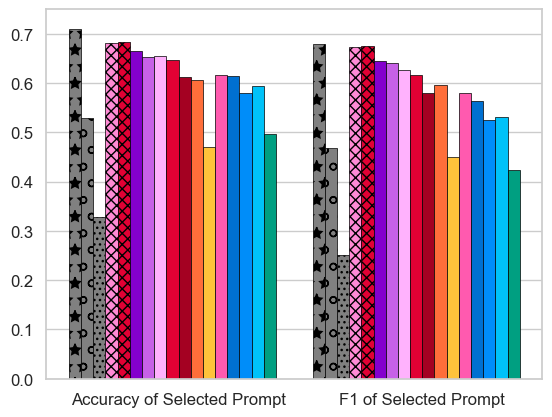

figure_1_legend.pdf


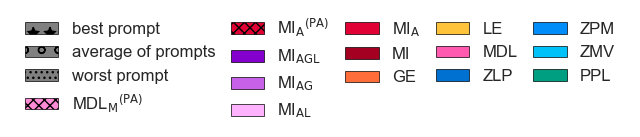

In [3]:
no_udynamic = True
add_task_average = False
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = main_method_order

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average, only_nn=False)

def _get_line_matrix_dict(df):
    matrix_dict = dict()
    for method in ['BEST', 'MEAN', 'WORST']:
        matrix_dict[method] = df.groupby('method')[[f'acc_{method}', f'f1_{method}']].mean().T[method_order]
        matrix_dict[method].index = porder
    return matrix_dict

matrix = df.groupby('method')[porder].mean().T[method_order]
line_dict = _get_line_matrix_dict(df)

add_lines = True
bar_width = 0.05
method_axis = 'columns'
color_fn = lambda idx, col: method_color_map[col]
hatch_fn = lambda idx, col: method_hatch_map[col]
add_lines_fn = get_add_lines_fn(color_fn, bar_width, method_axis, add_lines)

options = dict(
    df = None,
    pname = '',
    matrix = matrix,
    line_dict = line_dict,
    bar_width = bar_width,
    legend_width = 8,
    xlabel = '',
    index_order = porder,
    column_order = method_order,
    columns = 'method',
    index = 'category',
    method_axis = method_axis,
    color_fn = color_fn,
    hatch_fn = hatch_fn,
    title = '',
    add_lines = False,
    ylim = (0.0, 0.75),
    add_lines_fn = add_lines_fn,
    figsize=(6.4, 4.8),
    figname = 'figure_1',
    legend_rows = 5,
)
draw_simple_bar(**options)

# Figure 2

Accuracy and F1 of the prompts selected by existing probability-based prompt selection methods, averaged for each dataset category. The task average is also shown.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_2_acc.pdf


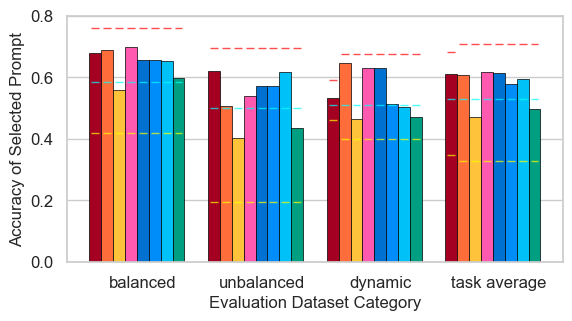

figure_2_legend.pdf


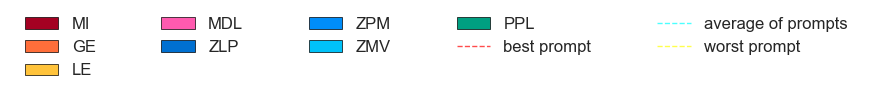

figure_2_f1.pdf


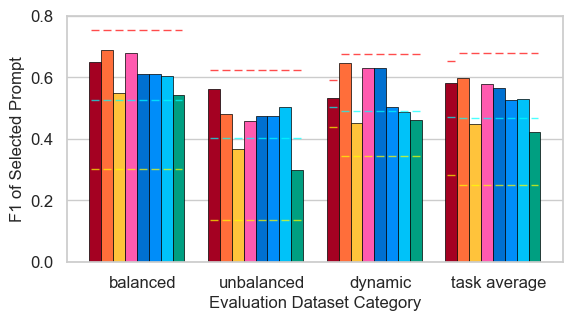

figure_2_legend.pdf


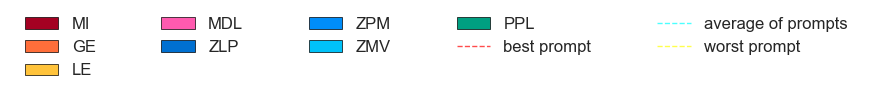

['balanced', 'unbalanced', 'dynamic', 'task average']
['MI', 'GE_D', 'LE', '-LE_I', 'ELP', 'EPM', 'EMV', '-PPL']


Accuracy of Selected Prompt                                          \
category                    balanced          unbalanced             dynamic   
method                                                                         
MI                            0.6795     \textbf{0.6201}              0.5330   
GE                \underline{0.6884}              0.5074     \textbf{0.6475}   
LE                            0.5602              0.4041              0.4647   
MDL                  \textbf{0.6996}              0.5403  \underline{0.6302}   
ZLP                           0.6566              0.5704              0.6290   
ZPM                           0.6566              0.5704              0.5138   
ZMV                           0.6521  \underline{0.6185}              0.5035   
PPL                           0.5970              0.4367              0.4695   

                             F1 of Selected Prompt                      \
category        task average              balanced          unbalanced   
method                                                                   
MI                    0.6116                0.6504     \textbf{0.5615}   
GE                    0.6062       \textbf{0.6889}              0.4818   
LE                    0.4708                0.5499              0.3687   
MDL          \textbf{0.6170}    \underline{0.6798}              0.4586   
ZLP       \underline{0.6149}                0.6110              0.4747   
ZPM                   0.5795                0.6110              0.4747   
ZMV                   0.5934                0.6048  \underline{0.5040}   
PPL                   0.4961                0.5416              0.2977   

                                                  
category             dynamic        task average  
method                                            
MI                    0.5336  \underline{0.5803}  
GE           \textbf{0.6474}     \textbf{0.5965}  
LE                    0.4510              0.4498  
MDL       \underline{0.6297}              0.5793  
ZLP                   0.6289              0.5641  
ZPM                   0.5023              0.5251  
ZMV                   0.4889              0.5304  
PPL                   0.4629              0.4236

In [4]:
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = base_method_order

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average, only_nn=True)

options = dict(
    df = df,
    bar_width = 0.1,
    legend_width = 11,
    xlabel = 'category',
    index_order = category_order + ['task average'],
    column_order = method_order,
    columns = 'method',
    index = 'category',
    method_axis = 'columns',
    color_fn = lambda idx, col: method_color_map[col],
    hatch_fn = lambda idx, col: method_hatch_map[col],
    title = '',
    add_lines = True,
    pnames = ['acc', 'f1'],
    figsize=(6.4, 3.2),
    figname = 'figure_2',
)
draw_bar(**options)
matrix = get_matrix_for_table(concat_axis=0, **options)
matrix

# Figure 4

Accuracy and F1 of the prompts selected by MIA and MI, averaged for each setup of a different number of tokens of verbalizers and evaluation dataset category. |v| denotes the number of tokens of the verbalizers.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
../ps_dicts/setup=v12__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
../ps_dicts/setup=v2__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl


{'opt2.7b'}
figure_4_acc.pdf


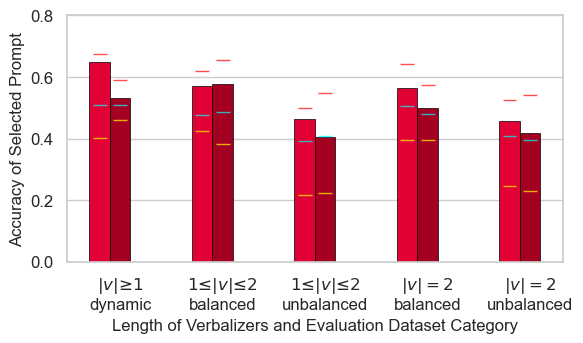

figure_4_legend.pdf


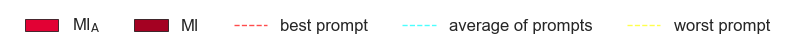

{'opt2.7b'}
figure_4_f1.pdf


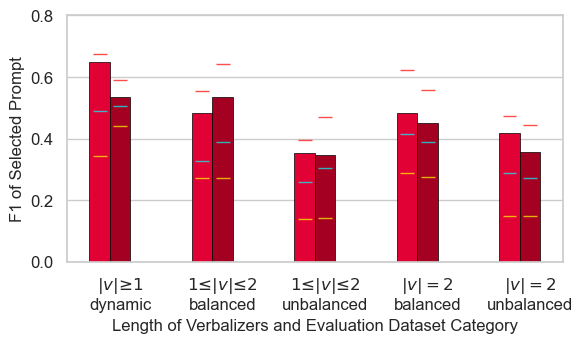

figure_4_legend.pdf


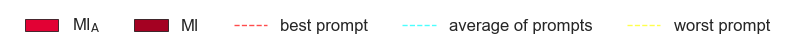

In [5]:
index_order_here = []
rename_map_here = setup_rename_map | method_rename_map

for setup in ['v1', 'v12', 'v2']:
    if setup in ['v12', 'v2']:
        task_order_here = cls_category_order
    else:
        task_order_here = ['dynamic']
    for task in task_order_here:
        index_here = f'{setup}_{task}'
        index_order_here.append(index_here)
        if setup == 'v1':
            rename_map_here[index_here] = f'$|v|≥1$\n{rename_map[task]}'
        else:
            rename_map_here[index_here] = f'{rename_map[setup]}\n{rename_map[task]}'

ps_dict = read_ps_dicts([
    {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False},
    {'setup': 'v12', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False},
    {'setup': 'v2', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False},
])

for pname in ['acc', 'f1']:
    no_udynamic = True
    add_task_average = False
    only_nn = True
    method_order = ['MIa', 'MI']

    df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average, only_nn=only_nn)
    df = filter_dataframe(df, filters=[(df['setup'].isin(['v12', 'v2'])) | (df['category'] == 'dynamic')])
    matrix = get_matrix(df, pname, index='setup,category', columns='method')
    line_dict = get_line_matrix_dict(df, pname, get_matrix_fn=get_matrix, index='setup,category', columns='method')

    add_lines = True
    bar_width = 0.2
    method_axis = 'columns'
    color_fn = lambda idx, col: method_color_map[col]
    hatch_fn = lambda idx, col: method_hatch_map[col]
    add_lines_fn = get_add_lines_fn(color_fn, bar_width, method_axis, add_lines)

    options = dict(
        df = None,
        pname = pname,
        matrix = matrix,
        rename_map = rename_map_here,
        line_dict = line_dict,
        bar_width = bar_width,
        legend_width = 10,
        xlabel = 'Length of Verbalizers and Evaluation Dataset Category',
        index_order = index_order_here,
        column_order = method_order,
        columns = 'method',
        index = 'category',
        method_axis = method_axis,
        color_fn = color_fn,
        hatch_fn = hatch_fn,
        title = '',
        add_lines = add_lines,
        add_lines_fn = add_lines_fn,
        figsize=(6.4, 3.2),
        figname = 'figure_4',
    )
    draw_simple_bar(**options)

# Figure 5

Accuracy and F1 of the prompts selected by different probability-based prompt selection methods, averaged
for each dataset category. The task average is also shown. The methods with subscripts are the combinational
variants proposed in this subsection, whose Prompt Selection Scores are shown in Table 4. The methods with
subscript M are combinational variants that use the component of MI; the methods with L perform instance-wise
prompt selection like MDL; the methods with G utilize one-hot $p(y|x, t)$ like GE. The methods with A use All
tokens to calculate $p(y|x, t)$.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}


figure_5_acc.pdf


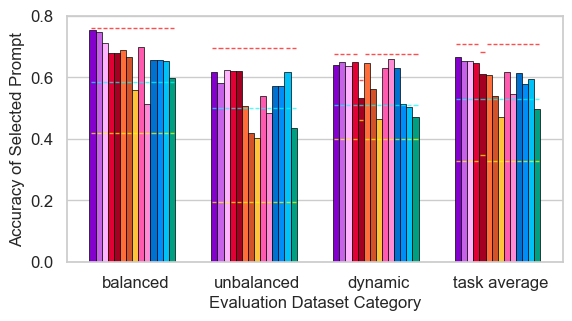

figure_5_legend.pdf


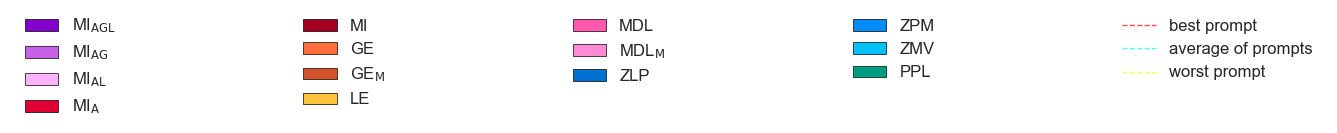

figure_5_f1.pdf


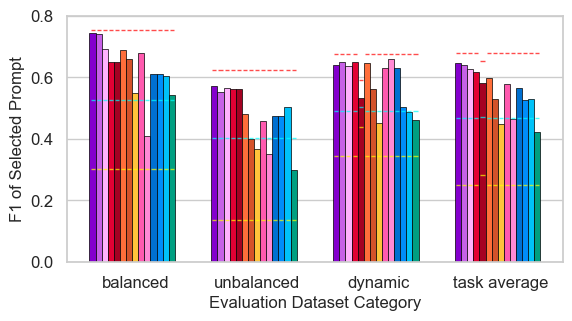

figure_5_legend.pdf


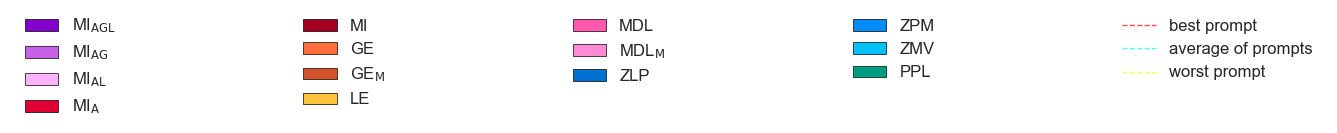

In [6]:
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = transfer_method_order

df = get_for_baseline(
    ps_dict, method_order=method_order,
    no_udynamic=no_udynamic, add_task_average=add_task_average,
    only_nn=True
)

options = dict(
    df = df,
    bar_width = 0.05,
    legend_width = 17,
    xlabel = 'category',
    index_order = category_order + ['task average'],
    column_order = method_order,
    columns = 'method',
    index = 'category',
    method_axis = 'columns',
    color_fn = lambda idx, col: method_color_map[col],
    hatch_fn = lambda idx, col: method_hatch_map[col],
    title = '',
    add_lines = True,
    pnames = ['acc', 'f1'],
    figsize=(6.4, 3.2),
    figname = 'figure_5',
)
draw_bar(**options)
# matrix = get_matrix_for_table(concat_axis=0, **options)
# matrix

# Figure 6

Accuracy and F1 of all prompts on each dataset, shown along with the performance of different probabilitybased prompt selection methods.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_6_acc.pdf


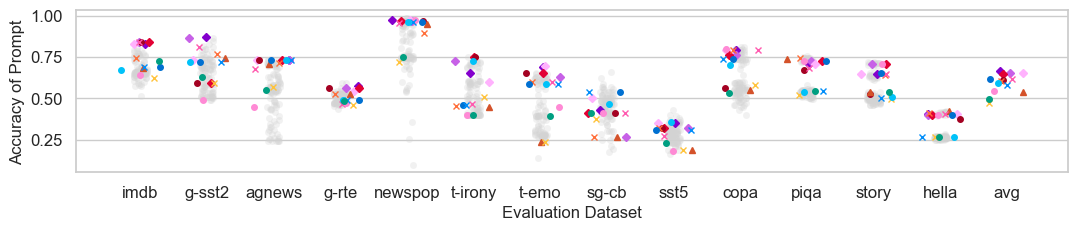

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_6_f1.pdf


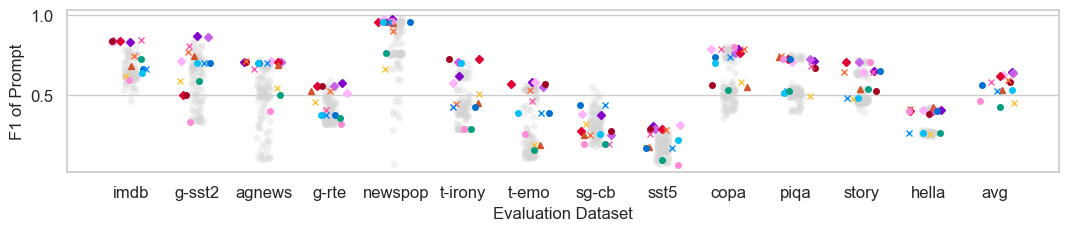

figure_6_legend.pdf


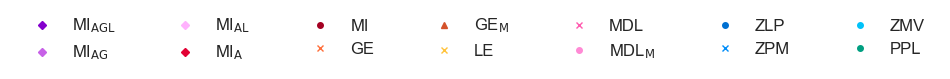

In [7]:
model = 'opt2.7b'
option = {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False}
metric_dict = get_metric_dict(option)
no_udynamic = True
only_nn = True
only_opt = True
add_task_average = True
metric = filter_dataframe(metric_dict['metric'], {'model': model}, no_udynamic=no_udynamic, only_nn=only_nn, only_opt=False)

ps_dict = read_ps_dict(option)

method_order = transfer_method_order
df = get_for_baseline(
    ps_dict, method_order=method_order,
    no_udynamic=no_udynamic, add_task_average=add_task_average, filter={'model': model}
)

options = dict(
    metric = metric,
    df = df,
    method_order = method_order,
    index = 'task',
    index_order = task_order + ['avg'],
    column_order = method_order,
    figsize = (12.8, 2.1),
    markersize = 4,
    legend_width = 12,
    marker = 'o',
    jitter = 0.3,
    alpha = 1.0,
    pnames = ['acc', 'f1'],
    xlabel = 'task',
    title = '',
    figname = f'figure_6',
)
draw_stripplot(**options)

# Figure 7

Limitations of Existing Calibration Method: Accuracy and F1 of the prompts selected by different
probability-based prompt selection methods, averaged across 13 datasets, for each scenario of PMIDC and CC calibration.

cbu
../ps_dicts/setup=v1__cali_type=cbu__cali_norm_type=softmax__do_filter=False.pkl


{'opt2.7b'}
figure_7_calibration_cbu_acc.pdf


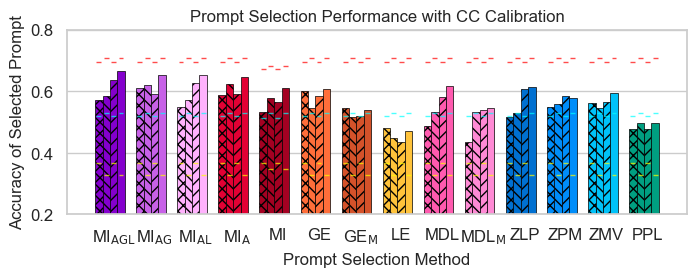

figure_7_calibration_cbu_f1.pdf


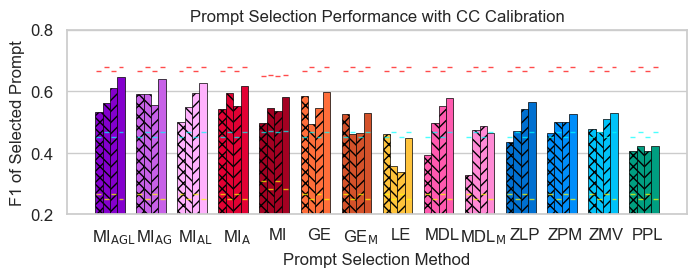

['MI_DI', 'MI_D', 'MI_I', 'MIa', 'MI', 'GE_D', 'GE', 'LE', '-LE_I', '-LE', 'ELP', 'EPM', 'EMV', '-PPL']
['CC', 'CN', 'NC', 'NN']
pmi
../ps_dicts/setup=v1__cali_type=pmi__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_7_calibration_pmi_acc.pdf


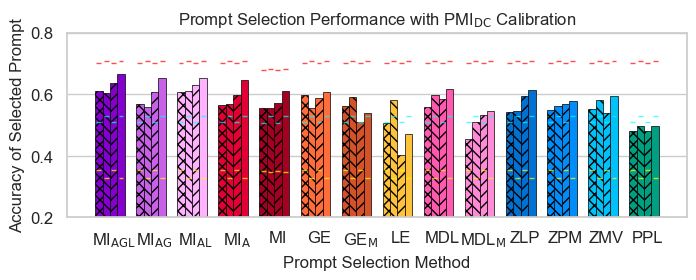

figure_7_calibration_pmi_f1.pdf


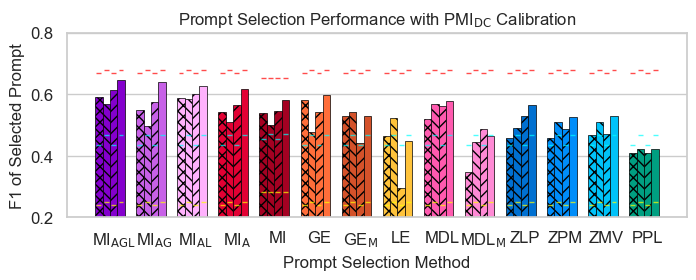

['MI_DI', 'MI_D', 'MI_I', 'MIa', 'MI', 'GE_D', 'GE', 'LE', '-LE_I', '-LE', 'ELP', 'EPM', 'EMV', '-PPL']
['CC', 'CN', 'NC', 'NN']


In [8]:
for cali_type in ['cbu', 'pmi']:
    print(cali_type)
    no_udynamic = True
    add_task_average = False
    ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': cali_type, 'cali_norm_type': 'softmax', 'do_filter': False})
    method_order = transfer_method_order

    df = get_for_baseline(
        ps_dict, method_order=method_order,
        no_udynamic=no_udynamic, add_task_average=add_task_average,
        only_nn=False
    )

    options = dict(
        df = df,
        bar_width = 0.18,
        legend_width = 17,
        xlabel = 'method',
        index_order = method_order,
        column_order = combn_order,
        columns = 'combn',
        index = 'method',
        method_axis = 'index',
        color_fn = lambda idx, col: method_color_map[idx],
        hatch_fn = lambda idx, col: combn_hatch_map[col],
        title = f"Prompt Selection Performance with {rename_map[cali_type]} Calibration",
        add_lines = True,
        pnames = ['acc', 'f1'],
        figsize=(8, 2.4), ylim = (0.2, 0.8),
        figname = f'figure_7_calibration_{cali_type}',
    )
    draw_bar(**options, no_legend=True)
    matrix = get_matrix_for_table(concat_axis=0, **options)
    matrix.T

# Figure 8

Ratio of prompts (out of 100) whose performance on each task improved by applying each calibration method for answer selection, averaged across 10 models.

ours


['opt66b' 'opt2.7b' 'opt30b' 'gpt-neo2.7b' 'bloom3b' 'opt1.3b' 'gpt1.5b'
 'gpt-j6b' 'opt6.7b' 'gpt-neo1.3b']
pmi
['opt66b' 'opt30b' 'gpt-neo1.3b' 'bloom3b' 'gpt-neo2.7b' 'gpt-j6b'
 'opt2.7b' 'opt6.7b' 'gpt1.5b' 'opt1.3b']
cbu
['gpt-j6b' 'gpt1.5b' 'bloom3b' 'opt6.7b' 'gpt-neo1.3b' 'opt30b'
 'gpt-neo2.7b' 'opt1.3b' 'opt2.7b' 'opt66b']
['opt2.7b']
['opt2.7b']
figure_8_None.pdf


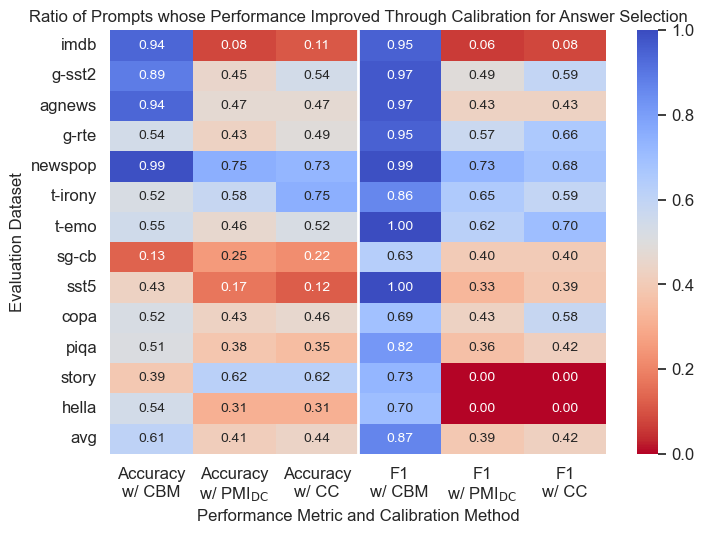

In [9]:
sanities = []
for cali_type in cali_type_order:
    print(cali_type)
    option = {'setup': 'v1', 'cali_type': cali_type, 'cali_norm_type': 'softmax', 'do_filter': False}
    _metric_dict = get_metric_dict(option)
    columns = ['model', 'task', 'prompt', 'category', 'setup', 'cali_type', 'cali_norm_type', 'do_filter']
    nn = filter_dataframe(_metric_dict['metric'], {'combn': 'NN'}).drop('combn', axis=1)[columns + ['acc', 'f1']]
    nc = filter_dataframe(_metric_dict['metric'], {'combn': 'NC'}).drop('combn', axis=1)[columns + ['acc', 'f1']]
    sanity = nn.merge(nc, on=columns)
    sanity['acc_better'] = sanity['acc_x'] < sanity['acc_y']
    sanity['f1_better'] = sanity['f1_x'] < sanity['f1_y']

    sanity = filter_dataframe(sanity, no_udynamic=True)
    sanities.append(sanity)
    print(sanity['model'].unique())

one_sanity = pd.concat(sanities)
matrixes = []

for pname in ['acc_better', 'f1_better']:
    df = filter_dataframe(one_sanity, {'model': 'opt2.7b'})
    print(df['model'].unique())
    matrixes.append(df.groupby(['task', 'cali_type'])[pname].mean().unstack()[cali_type_order])
matrix = pd.concat(matrixes, axis=1)

column_order_here = []
rename_map_here = rename_map.copy()

for pname in porder:
    for cali_type in cali_type_order:
        name = f'{pname}_{cali_type}'
        column_order_here.append(name)
        rename_map_here[name] = f"{'Accuracy' if 'acc' in pname else 'F1'}\nw/ {rename_map[cali_type]}"

matrix.columns = column_order_here
matrix.loc['avg', :] = matrix.mean(axis=0)
matrix = matrix[column_order_here].transpose()[task_order + ['avg']].transpose()

draw_simple_heatmap(
    matrix,
    pname = None,
    higher_better = True,
    annot_size = 10,
    index_order = task_order + ['avg'],
    column_order = column_order_here,
    xlabel = 'Performance Metric and Calibration Method',
    ylabel = 'task',
    title = "Ratio of Prompts whose Performance Improved Through Calibration for Answer Selection",
    figname = f'figure_8',
    cmap = 'coolwarm_r',
    rename_map = rename_map_here,
    axvlines = [3],
    figsize = (8, 5.5),
    vmin_vmax = (0, 1),
)

# Figure 9

Accuracy and F1 of the prompts selected by different probability-based prompt selection methods,
averaged across 13 datasets, for each scenario of CBM calibration.

ours
../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_9_calibration_ours_acc.pdf


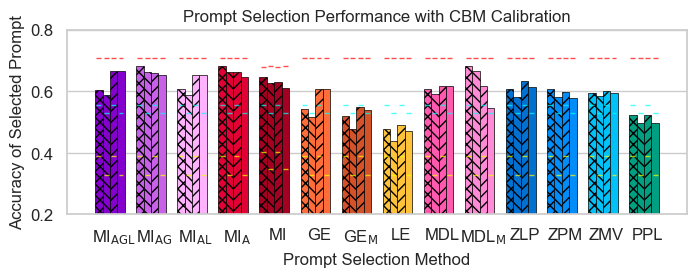

figure_9_calibration_ours_f1.pdf


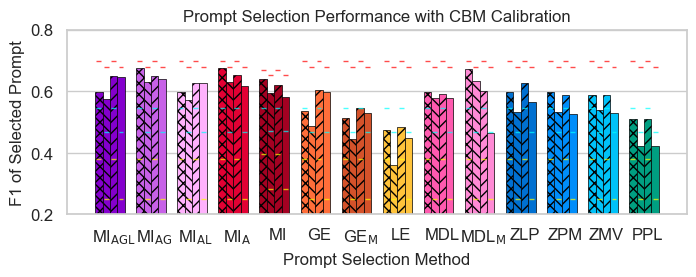

['MI_DI', 'MI_D', 'MI_I', 'MIa', 'MI', 'GE_D', 'GE', 'LE', '-LE_I', '-LE', 'ELP', 'EPM', 'EMV', '-PPL']
['CC', 'CN', 'NC', 'NN']


In [10]:
for cali_type in ['ours']:
    print(cali_type)
    no_udynamic = True
    add_task_average = False
    ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': cali_type, 'cali_norm_type': 'softmax', 'do_filter': False})
    method_order = transfer_method_order

    df = get_for_baseline(
        ps_dict, method_order=method_order,
        no_udynamic=no_udynamic, add_task_average=add_task_average,
        only_nn=False
    )

    options = dict(
        df = df,
        bar_width = 0.18,
        legend_width = 17,
        xlabel = 'method',
        index_order = method_order,
        column_order = combn_order,
        columns = 'combn',
        index = 'method',
        method_axis = 'index',
        color_fn = lambda idx, col: method_color_map[idx],
        hatch_fn = lambda idx, col: combn_hatch_map[col],
        title = f"Prompt Selection Performance with {rename_map[cali_type]} Calibration",
        add_lines = True,
        pnames = ['acc', 'f1'],
        figsize=(8, 2.4), ylim = (0.2, 0.8),
        figname = f'figure_9_calibration_{cali_type}',
    )
    draw_bar(**options, no_legend=True)
    matrix = get_matrix_for_table(concat_axis=0, **options)
    matrix.T

# Figure 10

Scaled performance of the prompts selected by different probability-based prompt selection methods for different models, averaged across 13 datasets.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}
figure_10_acc_to_best.pdf


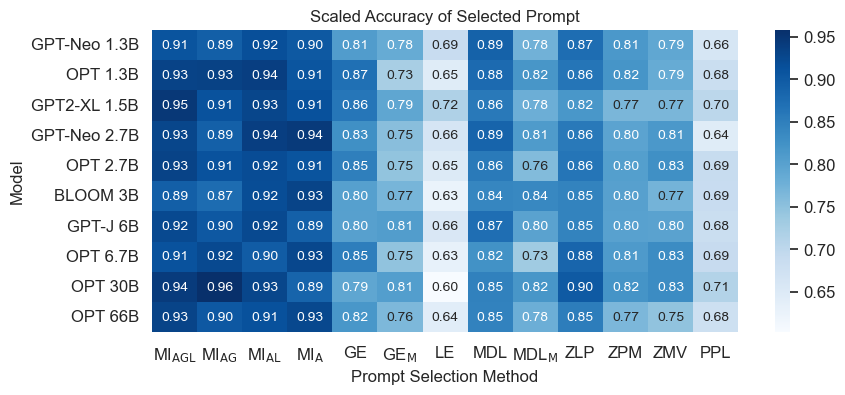

figure_10_f1_to_best.pdf


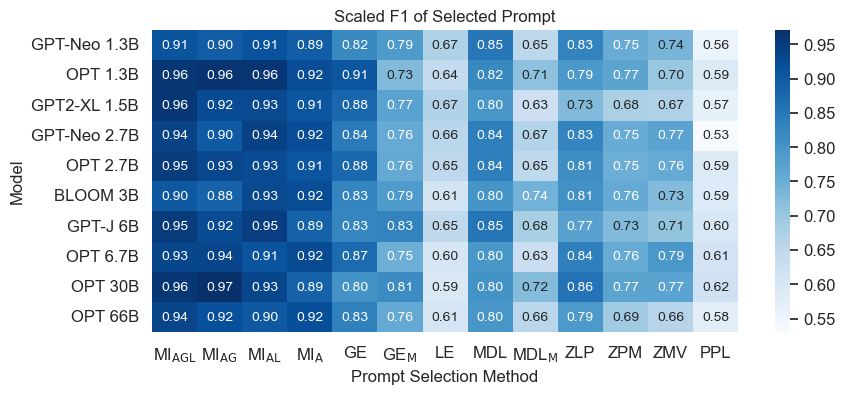

In [11]:
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = nomi_transfer_method_order

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average)

options = dict(
    df = df,
    bar_width = 0.11,
    legend_width = 11,
    index_order = model_order,
    column_order = method_order,
    columns = 'method',
    index = 'model',
    method_axis = 'columns',
    color_fn = lambda idx, col: method_color_map[col],
    hatch_fn = lambda idx, col: method_hatch_map[col],
    add_lines = True,
    pnames = ['acc_to_best', 'f1_to_best'],
    ylim=None,
    figsize = None,
    annot_size = 10,
    xlabel = 'method',
    ylabel = 'model',
    title = True,
    cmap = 'Blues',
    figname = 'figure_10',
)
draw_heatmap(**options)

# Figure 11

Correlation of the performance of the selected prompts and Prompt Selection Score of different probabilitybased prompt selection methods for different models, averaged across 13 datasets.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}
figure_11_acc_corr.pdf


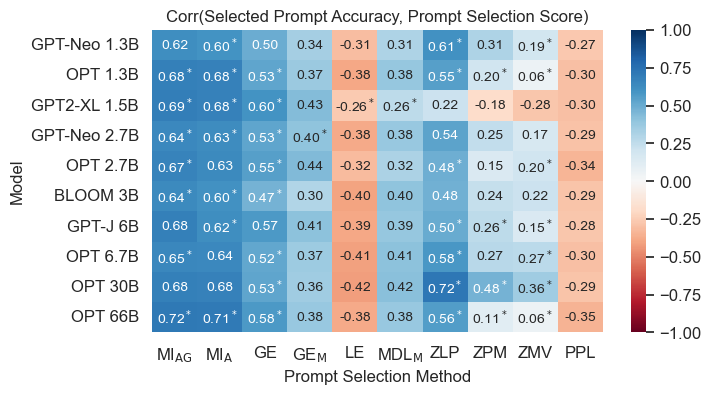

figure_11_f1_corr.pdf


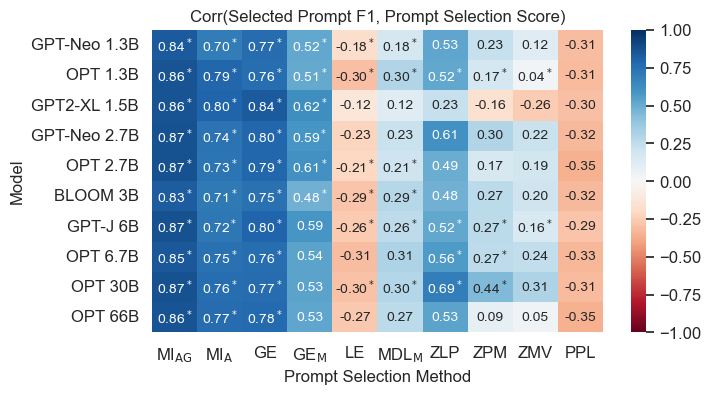

In [12]:
no_udynamic = True
add_task_average = False
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = nomi_corr_transfer_method_order

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average)

options = dict(
    df = df,
    bar_width = 0.11,
    legend_width = 11,
    index_order = model_order,
    column_order = method_order,
    columns = 'method',
    index = 'model',
    method_axis = 'columns',
    color_fn = lambda idx, col: method_color_map[col],
    hatch_fn = lambda idx, col: method_hatch_map[col],
    add_lines = True,
    pnames = ['acc_corr', 'f1_corr'],
    ylim=None,
    figsize = None,
    annot_size = 10,
    xlabel = 'method',
    ylabel = 'model',
    title = True,
    figname = 'figure_11',
    vmin_vmax = (-1, 1),
)
draw_heatmap(**options)

# Figure 12

Accuracy and F1 of the prompts selected by ZLP for each dataset without vs. with prompt filtering proposed by Liao et al. (2022).

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=True.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}
opt2.7b
figure_12_acc.pdf


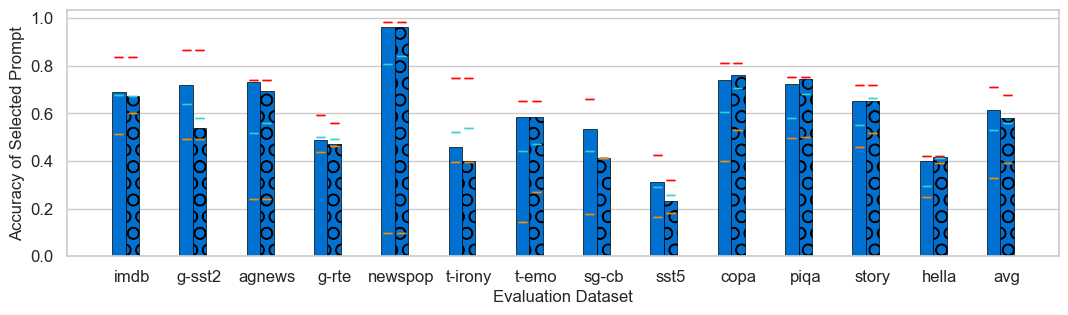

{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}
opt2.7b
figure_12_f1.pdf


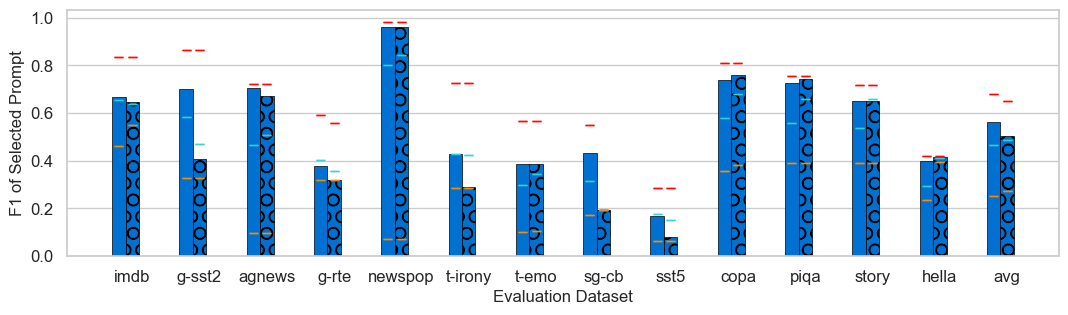

figure_12_legend.pdf


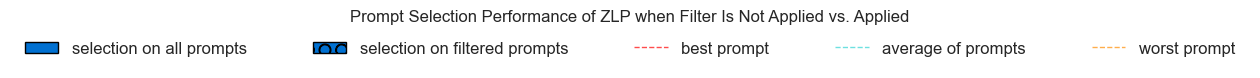

In [13]:
filter_type_order = ['all', 'filtered'] 
method_order = ['ELP']

hatch_map_here = {'all': '', 'filtered': 'O'}

rename_map_here = rename_map | {'all': 'selection on all prompts', 'filtered': 'selection on filtered prompts'}

ps_dict = read_ps_dicts([
    {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False},
    {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': True},
])

no_udynamic = True
only_nn = True

def add_lines_fn(line_dict, ax, idx, col, bar_x):
    for line in line_order:
        for method in ['BEST', 'MEAN', 'WORST']:
            ax.hlines(line_dict[method].loc[idx, col], bar_x - (bar_width * (1/3)), bar_x + (bar_width * (1/3)), colors=method_color_map[method + '_line_filter'], linewidth=1, alpha=0.7)

for pname in ['acc', 'f1']:
    df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=True, task_order=task_order, only_nn=only_nn)
    df = filter_dataframe(df, {'model': 'opt2.7b'})
    print('opt2.7b')

    matrix = get_matrix(df, pname, index='task', columns='do_filter', index_order=task_order + ['avg'], column_order=filter_type_order)
    line_dict = get_line_matrix_dict(df, pname, get_matrix_fn=get_matrix, index='task', columns='do_filter', index_order=task_order + ['avg'], column_order=filter_type_order)

    add_lines = True
    bar_width = 0.2
    method_axis = ''
    color_fn = lambda idx, col: method_color_map['ELP']
    hatch_fn = lambda idx, col: hatch_map_here[col]

    options = dict(
        df = None,
        pname = pname,
        matrix = matrix,
        rename_map = rename_map_here,
        line_dict = line_dict,
        bar_width = bar_width,
        legend_width = 14,
        xlabel = 'task',
        index_order = task_order + ['avg'],
        column_order = filter_type_order,
        columns = 'do_filter',
        index = 'task',
        method_axis = method_axis,
        color_fn = color_fn,
        hatch_fn = hatch_fn,
        title = '',
        add_lines = add_lines,
        add_lines_fn = add_lines_fn,
        figsize=(12.8, 3.2),
        ylim=None,
        figname = 'figure_12',
        no_legend = True,
    )
    draw_simple_bar(**options)

# Create custom legend for the horizontal lines
from matplotlib.lines import Line2D
filter_line_items = [
    Line2D([0], [0], color=method_color_map['BEST' + '_line_filter'], linestyle='--', linewidth=1, alpha=0.7),
    Line2D([0], [0], color=method_color_map['MEAN' + '_line_filter'], linestyle='--', linewidth=1, alpha=0.7),
    Line2D([0], [0], color=method_color_map['WORST' + '_line_filter'], linestyle='--', linewidth=1, alpha=0.7)
]

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=method_color_map['ELP'], edgecolor='black', hatch=hatch_map_here[ftype], label=rename_map_here[ftype])
    for ftype in filter_type_order
]

# Create a new figure for the legend
fig_leg = plt.figure(figsize=(16, 0.5))
ax_leg = fig_leg.add_subplot(111)

# Make the new axes invisible
ax_leg.axis('off')

# Add the legend to the new figure
legend_items = legend_elements + filter_line_items
legend_labels = [rename_map_here[ftype] for ftype in filter_type_order] + [rename_map.get(m, m) for m in ['BEST', 'MEAN', 'WORST']]
num_columns = len(legend_items)
leg = ax_leg.legend(legend_items, legend_labels, loc='center', ncol=num_columns, mode="expand")

ax_leg.set_title(f'Prompt Selection Performance of {rename_map["ELP"]} when Filter Is Not Applied vs. Applied')

# Save the new figure with the legend
figname = 'figure_12'
if figname:
  filename = f'{figname}_legend.pdf'
  fig_leg.savefig(filename, format='pdf', bbox_inches='tight')
  print(filename)

# Figure 13

Accuracy and F1 of all prompts on each dataset without vs. with prompt filtering proposed by Liao et al.(2022), shown along with the prompts selected by different probability-based prompt selection methods.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=True.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_13_filter_strip_filtered_acc.pdf


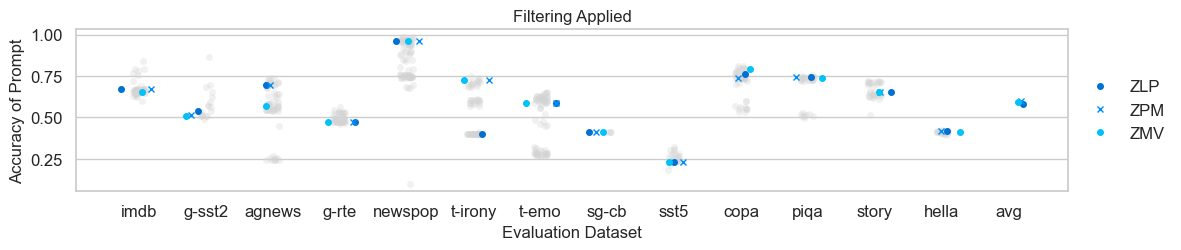

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_13_filter_strip_filtered_f1.pdf


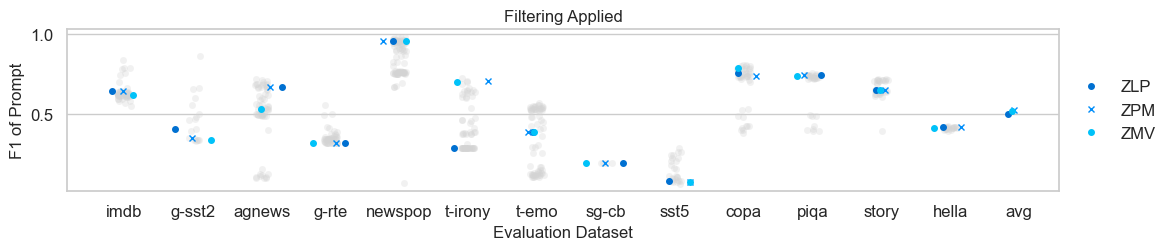

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_13_filter_strip_all_acc.pdf


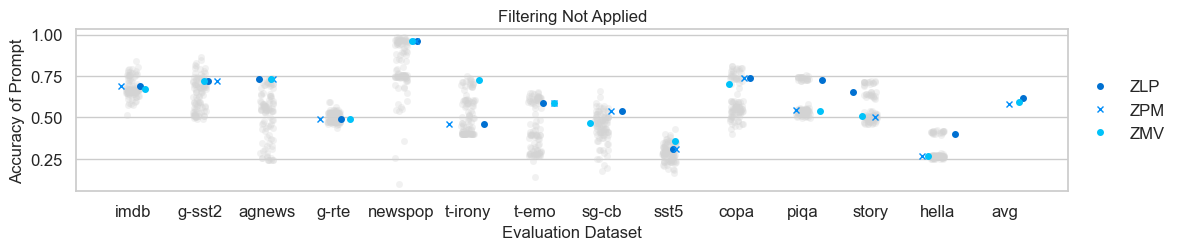

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_13_filter_strip_all_f1.pdf


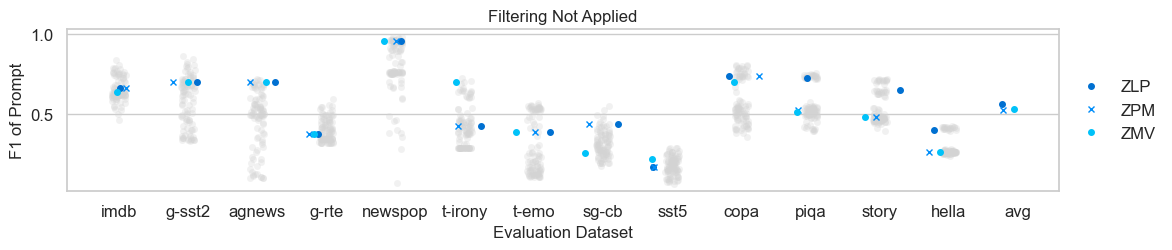

In [14]:
# Applied
no_udynamic = True
only_nn = True
only_opt = False
add_task_average = True

option = {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': True}
_metric_dict = get_metric_dict(option)

_metric = filter_dataframe(_metric_dict['metric'], no_udynamic=no_udynamic, only_nn=only_nn, only_opt=True)
ps_dict = read_ps_dict(option)
method_order = ['ELP', 'EPM', 'EMV']
df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average)
df = filter_dataframe(df, only_opt=True)

options = dict(
    metric = _metric,
    df = df,
    method_order = method_order,
    index = 'task',
    index_order = task_order + ['avg'],
    figsize = (12.8, 2.1),
    markersize = 4,
    legend_width = 8,
    marker = 'o',
    jitter = 0.3,
    alpha = 1.0,
    pnames = ['acc', 'f1'],
    xlabel = 'task',
    title = 'Filtering Applied',
    figname = 'figure_13_filter_strip_filtered',
)
draw_stripplot(**options)

# Not applied
no_udynamic = True
only_nn = True
only_opt = True
add_task_average = True

option = {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False}
metric_dict = get_metric_dict(option)

metric = filter_dataframe(metric_dict['metric'], no_udynamic=no_udynamic, only_nn=only_nn, only_opt=True)
ps_dict = read_ps_dict(option)
method_order = ['ELP', 'EPM', 'EMV']
df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average)
df = filter_dataframe(df, only_opt=True)

options = dict(
    metric = metric,
    df = df,
    method_order = method_order,
    index = 'task',
    index_order = task_order + ['avg'],
    figsize = (12.8, 2.1),
    markersize = 4,
    legend_width = 8,
    marker = 'o',
    jitter = 0.3,
    alpha = 1.0,
    pnames = ['acc', 'f1'],
    xlabel = 'task',
    title = 'Filtering Not Applied',
    figname = 'figure_13_filter_strip_all',
)
draw_stripplot(**options)

# Figure 14

Figures for correlation analysis. Pearson correlation is used to calculate correlations. Correlations with p < 0.05 are marked with ∗.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_14_a_acc_corr.pdf


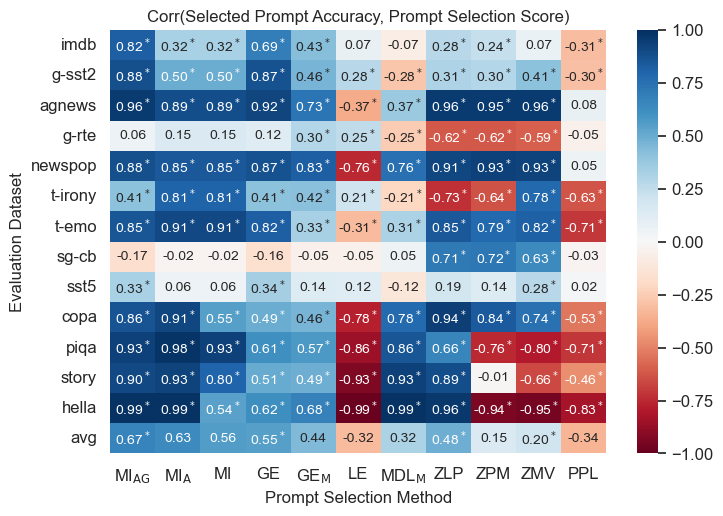

figure_14_a_f1_corr.pdf


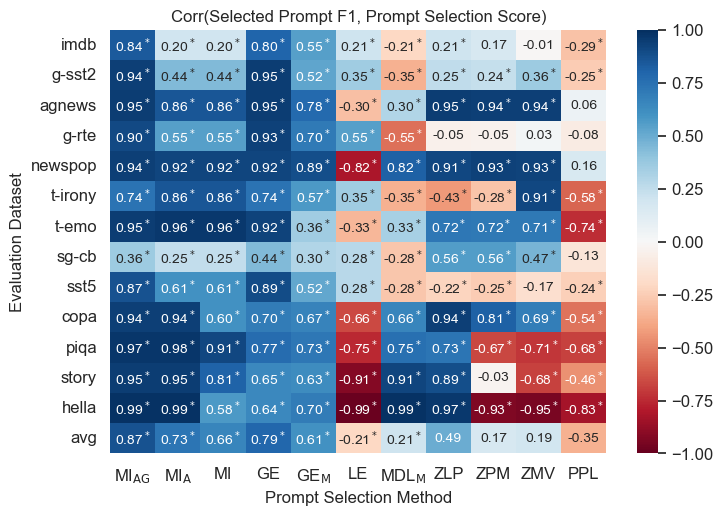

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_14_b_acc_to_best.pdf


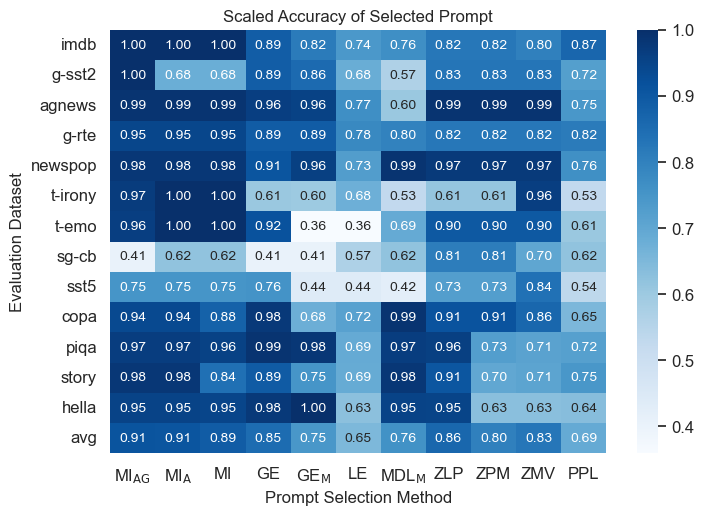

figure_14_b_f1_to_best.pdf


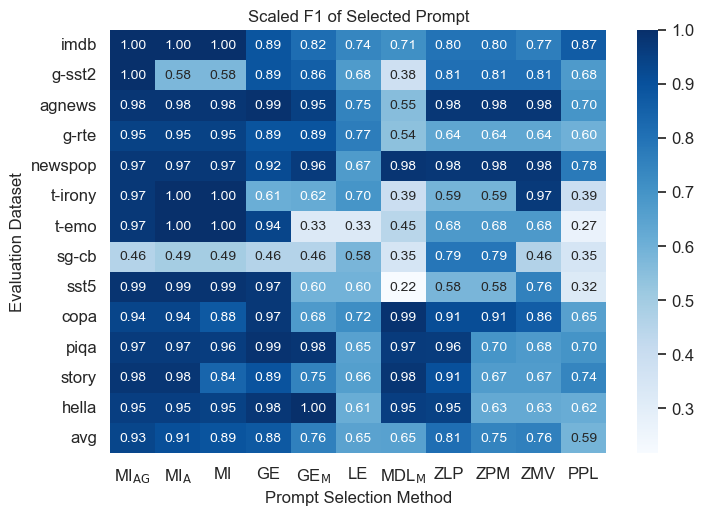

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}
['MIa' 'MI_D' 'GE_D' 'GE' 'LE' 'ELP' 'EPM' 'EMV' '-LE' '-PPL']
figure_14_c_acc.pdf


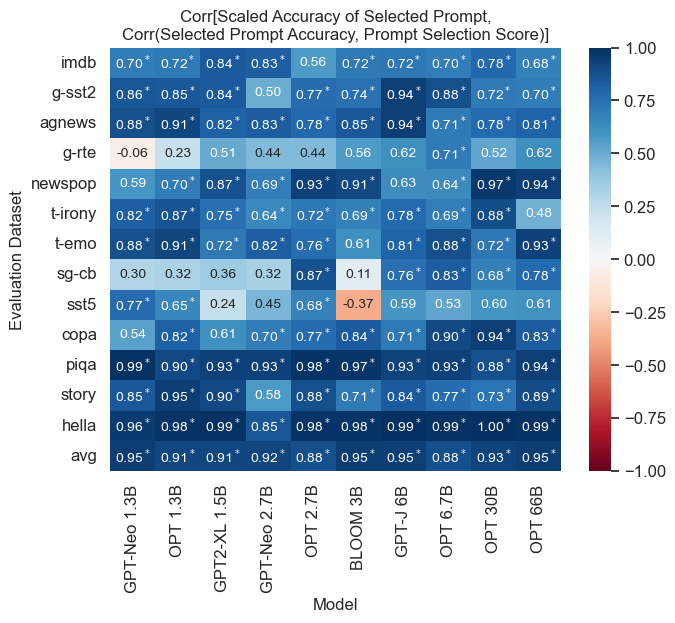

figure_14_c_f1.pdf


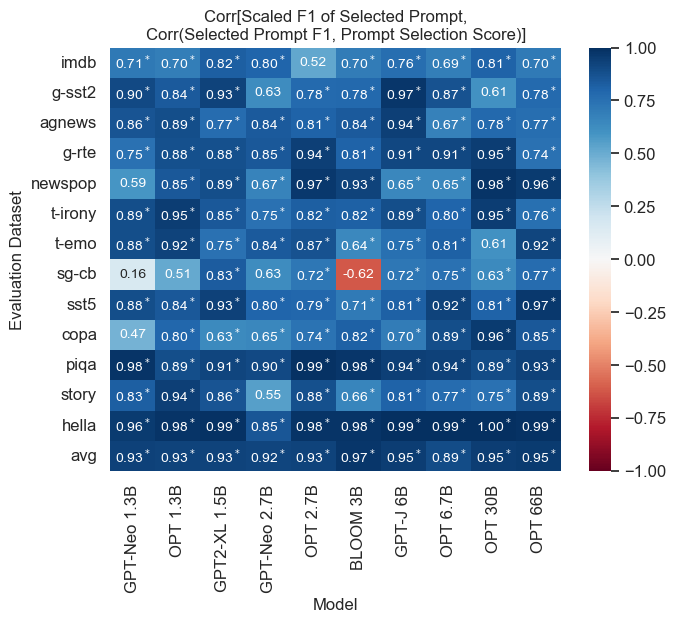

In [15]:
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = corr_transfer_method_order

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average)

options = dict(
    df = df,
    bar_width = 0.11,
    legend_width = 11,
    index_order = task_order + ['avg'],
    column_order = method_order,
    columns = 'method',
    index = 'task',
    method_axis = 'columns',
    color_fn = lambda idx, col: method_color_map[col],
    hatch_fn = lambda idx, col: method_hatch_map[col],
    add_lines = True,
    pnames = ['acc_corr', 'f1_corr'],
    ylim=None,
    figsize = None,
    annot_size = 10,
    xlabel = 'method',
    ylabel = 'task',
    title = True,
    figname = 'figure_14_a',
    vmin_vmax = (-1, 1),
)
draw_heatmap(**options)

# (b) Scaled Prompt Selection Performance
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = corr_transfer_method_order

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average)

options = dict(
    df = df,
    bar_width = 0.11,
    legend_width = 11,
    index_order = task_order + ['avg'],
    column_order = method_order,
    columns = 'method',
    index = 'task',
    method_axis = 'columns',
    color_fn = lambda idx, col: method_color_map[col],
    hatch_fn = lambda idx, col: method_hatch_map[col],
    add_lines = True,
    pnames = ['acc_to_best', 'f1_to_best'],
    ylim=None,
    figsize = None,
    annot_size = 10,
    xlabel = 'method',
    ylabel = 'task',
    title = True,
    cmap = 'Blues',
    figname = 'figure_14_b',
)
draw_heatmap(**options)

# (c) Correlation b/t (a) and (b)
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = nomi_corr_transfer_method_order

_task_order = task_order + ['avg']

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average)

print(df['method'].unique())

for pname in ['acc', 'f1']:
  matrix = df.groupby(['task', 'model'])[pname].mean().unstack()[model_order].transpose()[_task_order].transpose()
  pval_matrix = df.groupby(['task', 'model'])[pname].mean().unstack()[model_order].transpose()[_task_order].transpose()

  for name, subdf in df.groupby(['task', 'model']):
    task, model = name

    mer = subdf[f'{pname}_to_best']
    corr = subdf[f'{pname}_corr']

    pear = pearsonr(mer, corr)

    matrix.loc[task, model] = pear.statistic
    pval_matrix.loc[task, model] = pear.pvalue

  draw_simple_heatmap(
    matrix,
    pname=pname,
    pval_matrix = pval_matrix,
    index = 'task',
    columns = 'model',
    higher_better = True,
    index_order = _task_order,
    column_order = model_order,
    figsize = None,
    annot_size = 10,
    xlabel = 'model',
    ylabel = 'task',
    title = f'Corr[{rename_map[f"{pname}_to_best"]},\n{rename_map[f"{pname}_corr"]}]',
    figname = 'figure_14_c',
    vmin_vmax = (-1, 1),
  )

# Figure 15

100
figure_15_calibration_GE_D_scatter_NN.pdf


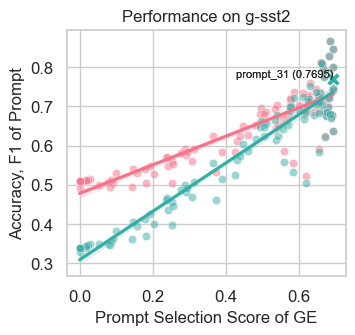

100
figure_15_calibration_GE_D_scatter_NC.pdf


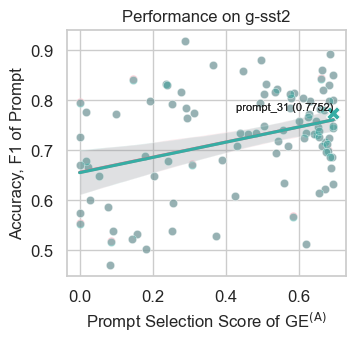

100
figure_15_calibration_GE_D_scatter_CN.pdf


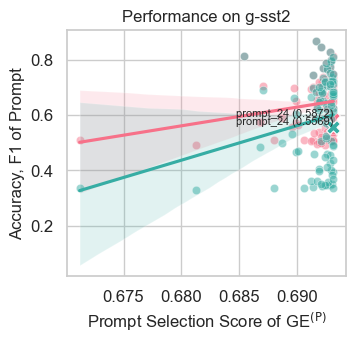

100
figure_15_calibration_GE_D_scatter_CC.pdf


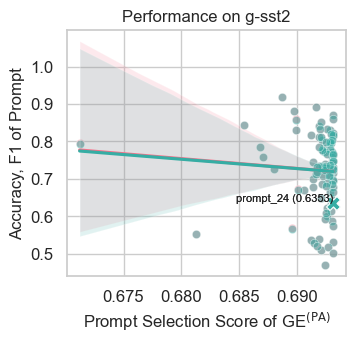

100
figure_15_calibration_GE_scatter_NN.pdf


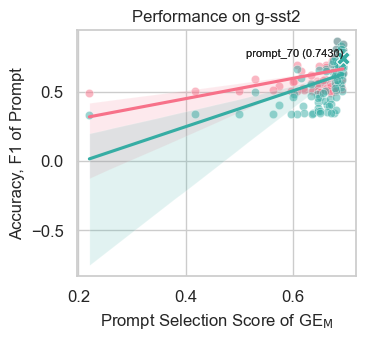

100
figure_15_calibration_GE_scatter_NC.pdf


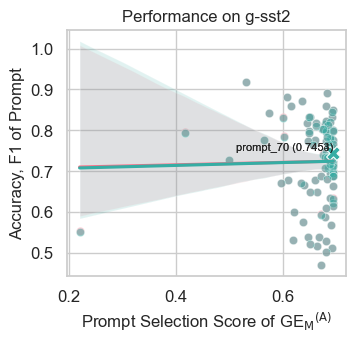

100
figure_15_calibration_GE_scatter_CN.pdf


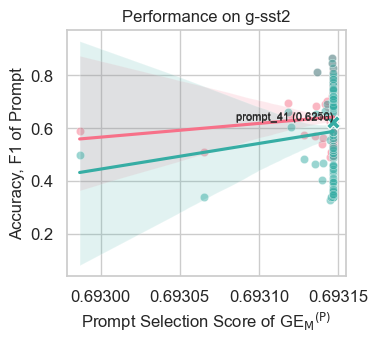

100
figure_15_calibration_GE_scatter_CC.pdf


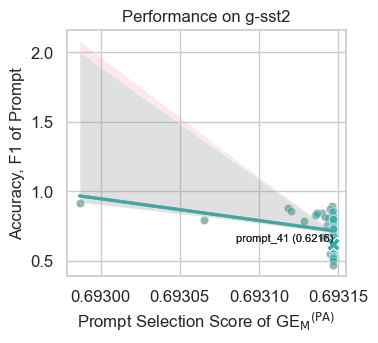

100
figure_15_calibration_-LE_scatter_NN.pdf


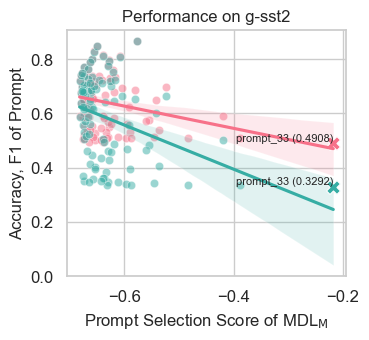

100
figure_15_calibration_-LE_scatter_NC.pdf


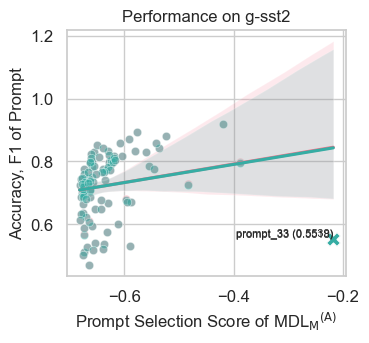

100
figure_15_calibration_-LE_scatter_CN.pdf


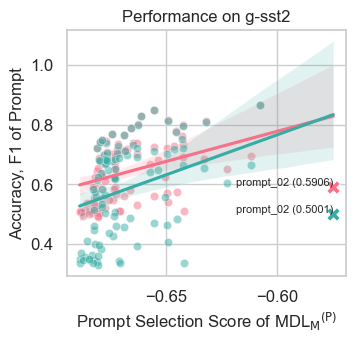

100
figure_15_calibration_-LE_scatter_CC.pdf


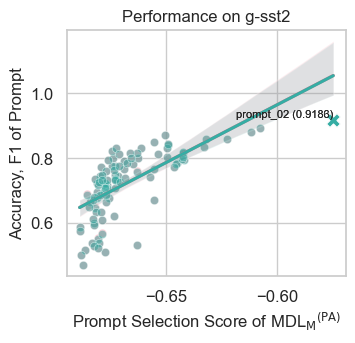

100
figure_15_calibration_MIa_scatter_NN.pdf


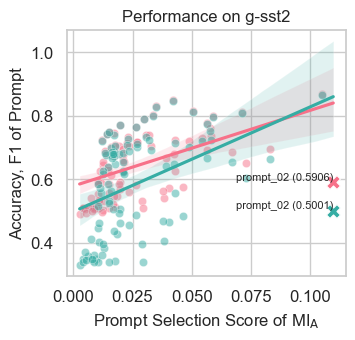

100
figure_15_calibration_MIa_scatter_NC.pdf


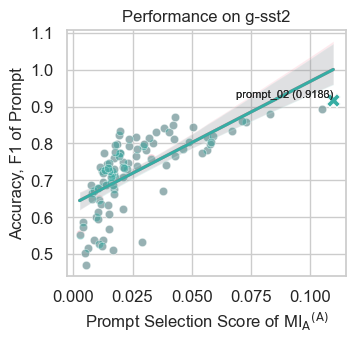

100
figure_15_calibration_MIa_scatter_CN.pdf


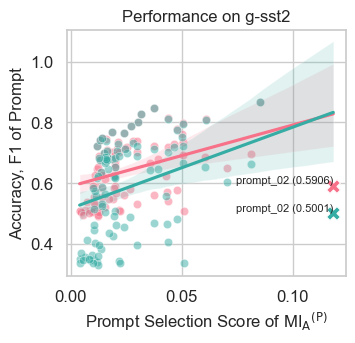

100
figure_15_calibration_MIa_scatter_CC.pdf


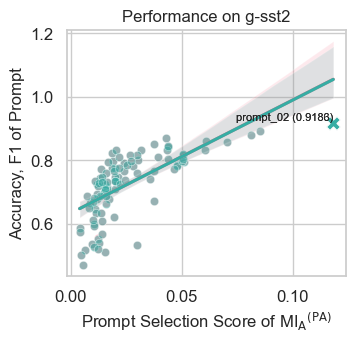

In [16]:
option = {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False}
metric_dict = get_metric_dict(option)

# GE
scatter_filter = dict(
    model = 'opt2.7b',
    task = 'sst2',
    method = 'GE_D',
)

metric = filter_dataframe(metric_dict['metric'], {'task': scatter_filter['task']}, no_udynamic=True, only_nn=False, only_opt=True)

for combn in ['NN', 'NC', 'CN', 'CC']:
    draw_simple_scatter(
        metric = filter_dataframe(metric, {'combn': combn}),
        x_column = scatter_filter['method'],
        y_columns = porder,
        title=f"Performance on {rename_map[scatter_filter['task']]}", figsize=(3.6, 3.2),
        rename_map=rename_map,
        xtitle = 'Prompt Selection Score of ' + get_combn_method_name(scatter_filter['method'], combn),
        show_corr=True,
        figname=f'figure_15_calibration_{scatter_filter["method"]}_scatter_{combn}',
    )

scatter_filter = dict(
    model = 'opt2.7b',
    task = 'sst2',
    method = 'GE',
)

metric = filter_dataframe(metric_dict['metric'], {'task': scatter_filter['task']}, no_udynamic=True, only_nn=False, only_opt=True)

for combn in ['NN', 'NC', 'CN', 'CC']:
    draw_simple_scatter(
        metric = filter_dataframe(metric, {'combn': combn}),
        x_column = scatter_filter['method'],
        y_columns = porder,
        title=f"Performance on {rename_map[scatter_filter['task']]}", figsize=(3.6, 3.2),
        rename_map=rename_map,
        xtitle = 'Prompt Selection Score of ' + get_combn_method_name(scatter_filter['method'], combn),
        show_corr=True,
        figname=f'figure_15_calibration_{scatter_filter["method"]}_scatter_{combn}',
    )

# MDL_M
scatter_filter = dict(
    model = 'opt2.7b',
    task = 'sst2',
    method = '-LE',
)

metric = filter_dataframe(metric_dict['metric'], {'task': scatter_filter['task']}, no_udynamic=True, only_nn=False, only_opt=True)

for combn in ['NN', 'NC', 'CN', 'CC']:
    draw_simple_scatter(
        metric = filter_dataframe(metric, {'combn': combn}),
        x_column = scatter_filter['method'],
        y_columns = porder,
        title=f"Performance on {rename_map[scatter_filter['task']]}", figsize=(3.6, 3.2),
        rename_map=rename_map,
        xtitle = 'Prompt Selection Score of ' + get_combn_method_name(scatter_filter['method'], combn),
        show_corr=True,
        figname=f'figure_15_calibration_{scatter_filter["method"]}_scatter_{combn}',
    )

# MI
scatter_filter = dict(
    model = 'opt2.7b',
    task = 'sst2',
    method = 'MIa',
)

metric = filter_dataframe(metric_dict['metric'], {'task': scatter_filter['task']}, no_udynamic=True, only_nn=False, only_opt=True)

for combn in ['NN', 'NC', 'CN', 'CC']:
    draw_simple_scatter(
        metric = filter_dataframe(metric, {'combn': combn}),
        x_column = scatter_filter['method'],
        y_columns = porder,
        title=f"Performance on {rename_map[scatter_filter['task']]}", figsize=(3.6, 3.2),
        rename_map=rename_map,
        xtitle = 'Prompt Selection Score of ' + get_combn_method_name(scatter_filter['method'], combn),
        show_corr=True,
        figname=f'figure_15_calibration_{scatter_filter["method"]}_scatter_{combn}',
    )

# Figure 16

Comparison of accuracy in dynamic datasets without and with extreme label bias.

figure_16_a_legend.pdf
../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_16_a_acc.pdf


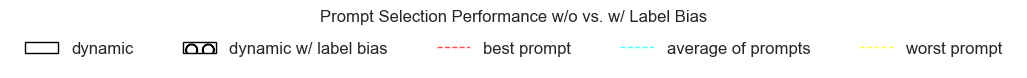

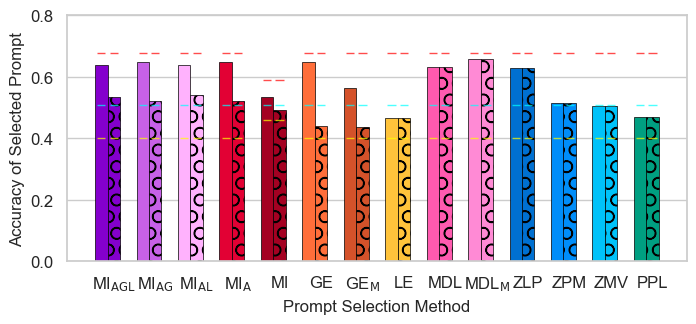

['MI_DI', 'MI_D', 'MI_I', 'MIa', 'MI', 'GE_D', 'GE', 'LE', '-LE_I', '-LE', 'ELP', 'EPM', 'EMV', '-PPL']
['dynamic', 'udynamic']
../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_16_b_acc_to_best.pdf


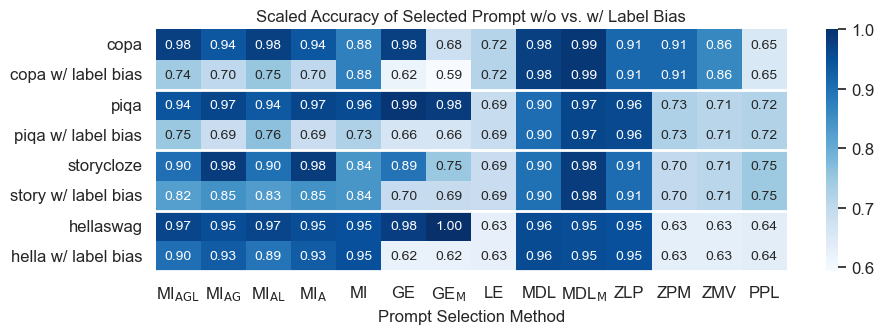

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_16_c_acc.pdf


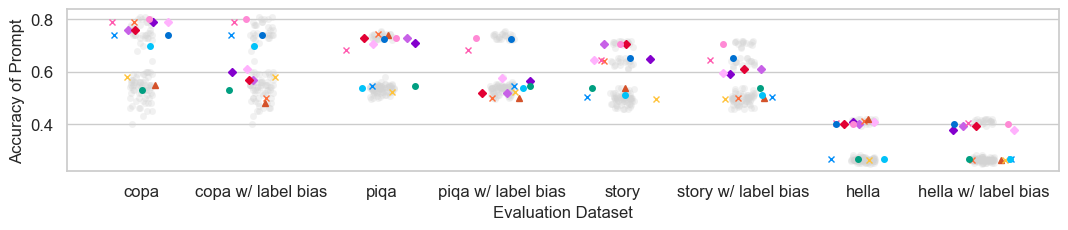

figure_16_c_legend.pdf


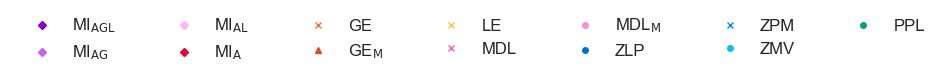

figure_16_de_legend.pdf
../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_16_d_acc.pdf


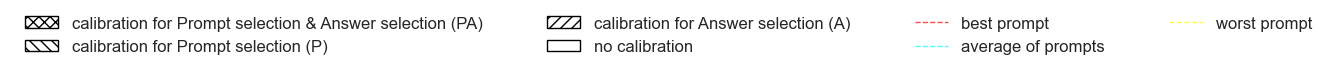

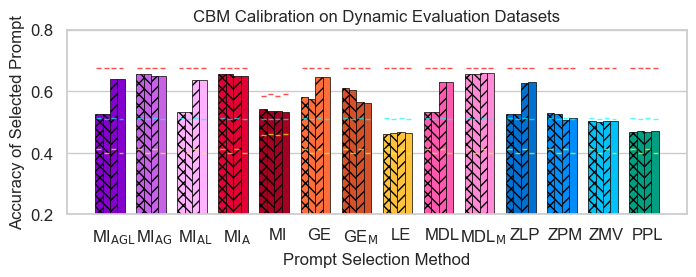

figure_16_e_acc.pdf


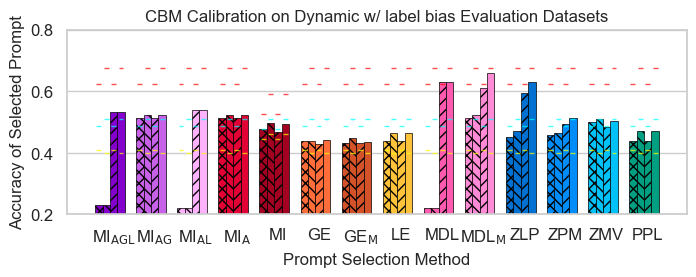

In [17]:
from matplotlib.patches import Patch
hatch_map_here = {
    'dynamic': None,
    'udynamic': 'O',
}
legend_elements = [
  Patch(facecolor='white', edgecolor='black', hatch=hatch_map_here[combn], label=rename_map[combn])
  for combn in ['dynamic', 'udynamic']
] + line_items

# Create a new figure for the legend
fig_leg = plt.figure(figsize=(13, 0.5))
ax_leg = fig_leg.add_subplot(111)

# Make the new axes invisible
ax_leg.axis('off')

# Add the legend to the new figure
legend_items = legend_elements
legend_labels = [rename_map[combn] for combn in ['dynamic', 'udynamic']] + [rename_map.get(m, m) for m in line_order]
num_columns = len(legend_items)
leg = ax_leg.legend(legend_items, legend_labels, loc='center', ncol=num_columns, mode="expand")

ax_leg.set_title('Prompt Selection Performance w/o vs. w/ Label Bias')

# Save the new figure with the legend
figname = 'figure_16_a'
if figname:
    filename = f'{figname}_legend.pdf'
    fig_leg.savefig(filename, format='pdf', bbox_inches='tight')
    print(filename)

'''
(a) Accuracy of the prompts selected by different
probability-based prompt selection methods averaged across datasets of dynamic category without
vs. with label bias.
'''
no_udynamic = False
add_task_average = False
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = transfer_method_order

df = get_for_baseline(
    ps_dict, method_order=method_order,
    no_udynamic=no_udynamic, add_task_average=add_task_average,
    only_nn=True
)

options = dict(
    df = df,
    bar_width = 0.3,
    legend_width = 14,
    xlabel = 'method',
    index_order = method_order,
    column_order = ['dynamic', 'udynamic'],
    columns = 'category',
    rename_map = rename_map,
    index = 'method',
    method_axis = 'index',
    color_fn = lambda idx, col: method_color_map[idx],
    hatch_fn = lambda idx, col: hatch_map_here[col],
    title = '',
    add_lines = True,
    pnames = ['acc'],
    figsize=(8, 3.2),
    figname = 'figure_16_a',
    no_legend = True,
)
draw_bar(**options)
matrix = get_matrix_for_table(concat_axis=0, **options)
matrix

'''
(b) Scaled accuracy of the prompts selected by different
probability-based prompt selection methods on each dataset of
dynamic category without vs. with label bias.
'''
no_udynamic = False
add_task_average = True
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = transfer_method_order

df = get_for_baseline(
    ps_dict, method_order=method_order,
    no_udynamic=no_udynamic, add_task_average=False,
    only_nn=True
)

task_order_here = dyn_task_order + udyn_task_order
task_order_here = sum([[task_order_here[i], task_order_here[i + 4]] for i in range(4)], [])

rename_map_here = rename_map | {task: 'w/ label bias' if task.startswith('U') else task for task in task_order}

for pname in ['acc_to_best']:
    matrix = df.groupby(['task', 'method'])[pname].mean().unstack()[method_order].transpose()[task_order_here].transpose()

    draw_simple_heatmap(
        matrix,
        pname,
        higher_better = True,
        figsize = None,
        annot_size = 10,
        xlabel = 'method',
        ylabel = '',
        title = rename_map[pname] + ' w/o vs. w/ Label Bias',
        figname = f'figure_16_b',
        cmap = 'Blues',
        rename_map = rename_map_here,
        axhlines = [2, 4, 6, 8, 10, 12, 14],
    )

'''
(c) Accuracy of all prompts on dynamic datasets with vs. without label bias, 
shown along with the performance of different
probability-based prompt selection methods.
'''
model = 'opt2.7b'
no_udynamic = False
add_task_average = False
only_nn = True
metric = filter_dataframe(metric_dict['metric'], {'model': model}, no_udynamic=no_udynamic, only_nn=only_nn)
option = {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False}  
ps_dict = read_ps_dict(option)
method_order = nomi_transfer_method_order
df = get_for_baseline(
    ps_dict, method_order=method_order,
    no_udynamic=no_udynamic, add_task_average=add_task_average, filter={'model': model}
)

options = dict(
    metric = metric,
    df = df,
    method_order = method_order,
    index = 'task',
    index_order = task_order_here,
    figsize = (12.8, 2.1),
    markersize = 4,
    legend_width = 12,
    marker = 'o',
    jitter = 0.3,
    alpha = 1.0,
    pnames = ['acc'],
    xlabel = 'task',
    title = '',
    figname = f'figure_16_c',
    no_udynamic = no_udynamic,
)
draw_stripplot(**options)

# (d), (e)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='white', edgecolor='black', hatch=combn_hatch_map[combn], label=rename_map[combn])
    for combn in combn_order
] + line_items

# Create a new figure for the legend
fig_leg = plt.figure(figsize=(17, 0.1))
ax_leg = fig_leg.add_subplot(111)

# Make the new axes invisible
ax_leg.axis('off')

# Add the legend to the new figure
legend_items = legend_elements
legend_labels = [rename_map[combn] for combn in combn_order] + [rename_map.get(m, m) for m in line_order]
num_columns = len(legend_items) // 2 + 1
leg = ax_leg.legend(legend_items, legend_labels, loc='center', ncol=num_columns, mode="expand")

# Save the new figure with the legend
figname = 'figure_16_de'
if figname:
    filename = f'{figname}_legend.pdf'
    fig_leg.savefig(filename, format='pdf', bbox_inches='tight')
    print(filename)

no_udynamic = False
add_task_average = False
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = transfer_method_order

df = get_for_baseline(
    ps_dict, method_order=method_order,
    no_udynamic=no_udynamic, add_task_average=add_task_average,
    only_nn=False
)

# (d) CBM calibration on dynamic datasets w/o label bias.
category = 'dynamic'
_df = filter_dataframe(df, {'category': category})
options = dict(
    df = _df,
    bar_width = 0.18,
    legend_width = 17,
    xlabel = 'method',
    index_order = method_order,
    column_order = combn_order,
    columns = 'combn',
    index = 'method',
    method_axis = 'index',
    color_fn = lambda idx, col: method_color_map[idx],
    hatch_fn = lambda idx, col: combn_hatch_map[col],
    title = f'{rename_map["ours"]} Calibration on {rename_map[category].capitalize()} Evaluation Datasets',
    title_suffix = '',
    add_lines = True,
    pnames = ['acc'],
    figsize=(8, 2.4), ylim = (0.2, 0.8),
    figname = f'figure_16_d',
    no_legend=True,
)
draw_bar(**options)

# (e) CBM calibration on dynamic datasets w/ label bias.
category = 'udynamic'
_df = filter_dataframe(df, {'category': 'udynamic'})
options = dict(
    df = _df,
    bar_width = 0.18,
    legend_width = 17,
    xlabel = 'method',
    index_order = method_order,
    column_order = combn_order,
    columns = 'combn',
    index = 'method',
    method_axis = 'index',
    color_fn = lambda idx, col: method_color_map[idx],
    hatch_fn = lambda idx, col: combn_hatch_map[col],
    title = f'{rename_map["ours"]} Calibration on {rename_map[category].capitalize()} Evaluation Datasets',
    title_suffix = '',
    add_lines = True,
    pnames = ['acc'],
    figsize=(8, 2.4), ylim = (0.2, 0.8),
    figname = f'figure_16_e',
    no_legend=True,
)
draw_bar(**options)

# Figure 17

Accuracy and F1 of all prompts on dynamic datasets in a few-shot in-context learning setting, shown along with the performance of different probability-based prompt selection methods.

../ps_dicts/setup=few__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_17_acc.pdf


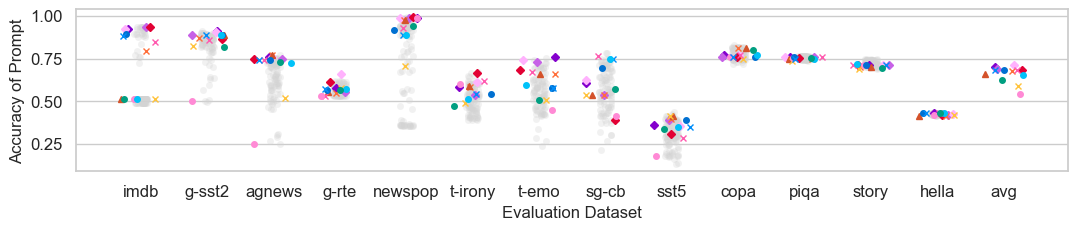

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_17_f1.pdf


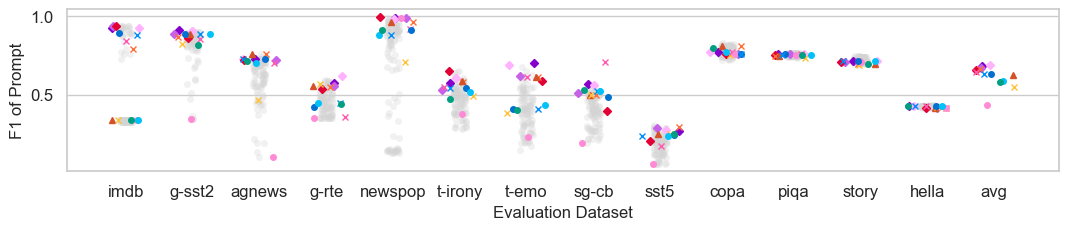

figure_17_legend.pdf


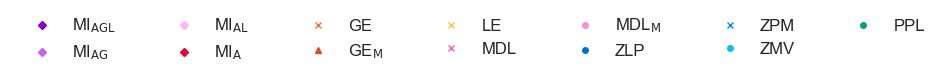

In [18]:
no_udynamic = True
only_nn = True
only_opt = True
add_task_average = True

option = {'setup': 'few', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False}
metric_dict = get_metric_dict_few(option)

model = 'opt2.7b'
metric = filter_dataframe(metric_dict['metric'], {'model': model}, no_udynamic=no_udynamic, only_nn=only_nn, only_opt=True)
option = {'setup': 'few', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False}
ps_dict = read_ps_dict(option)

method_order = nomi_transfer_method_order
df = get_for_baseline(
    ps_dict, method_order=method_order,
    no_udynamic=no_udynamic, add_task_average=add_task_average, filter={'model': model}
)

options = dict(
    metric = metric,
    df = df,
    method_order = method_order,
    index = 'task',
    index_order = task_order + ['avg'],
    column_order = method_order,
    figsize = (12.8, 2.1),
    markersize = 4,
    legend_width = 12,
    marker = 'o',
    jitter = 0.3,
    alpha = 1.0,
    pnames = ['acc', 'f1'],
    xlabel = 'task',
    title = '',
    figname = f'figure_17',
)
draw_stripplot(**options)

# Figure 18

Scaled accuracy and scaled F1 of the prompts selected by different probability-based prompt selection methods on each dataset category in zero-shot vs. few-shot setting.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
../ps_dicts/setup=few__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_18_acc_to_best_acc_to_best.pdf


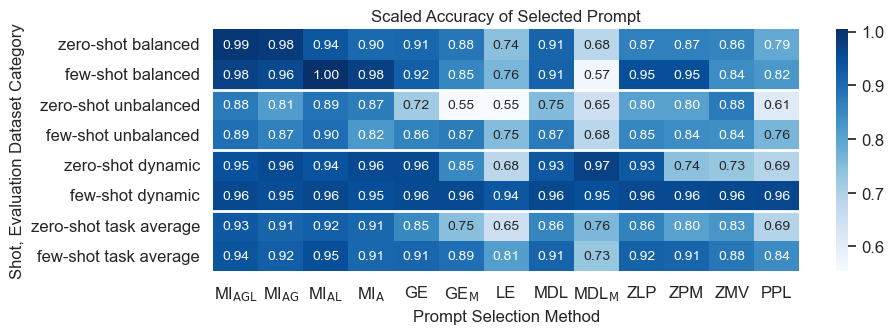

figure_18_f1_to_best_f1_to_best.pdf


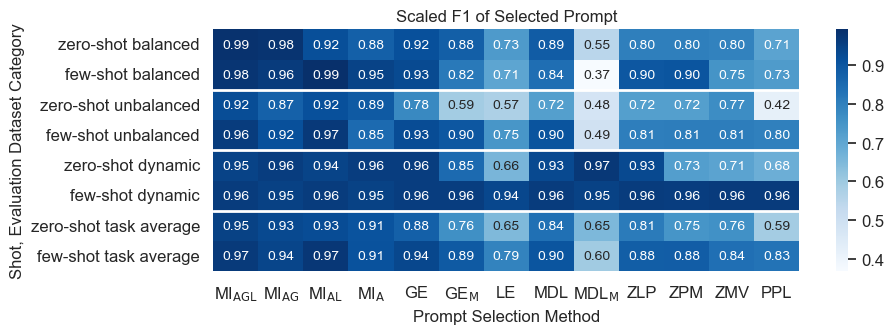

In [19]:
index_order_here = []
rename_map_here = rename_map.copy()

for category in category_order + ['task average']:
    for setup in ['v1', 'few']:
        name = f'{setup}_{category}'
        index_order_here.append(name)
        rename_map_here[name] = f'{"zero-shot" if setup == "v1" else "few-shot"} {category}'
    
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dicts([
    {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False},
    {'setup': 'few', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False},
])
method_order = nomi_transfer_method_order

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average)

for pname in ['acc_to_best', 'f1_to_best']:
    matrix = get_matrix(df, pname, index='setup,category', columns='method')[method_order].transpose()[index_order_here].transpose()
    draw_simple_heatmap(
        matrix,
        pname,
        higher_better = True,
        figsize = None,
        annot_size = 10,
        xlabel = 'method',
        ylabel = 'Shot, Evaluation Dataset Category',
        title = rename_map[pname],
        figname = f'figure_18_{pname}',
        cmap = 'Blues',
        rename_map = rename_map_here,
        axhlines = [2, 4, 6],
        set_vmin_vmax = False,
    )

# Figure 19

Few-shot accuracy and F1 of the prompts selected by different probability-based prompt selection methods, averaged for each dataset category.

../ps_dicts/setup=few__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}


figure_19_acc.pdf


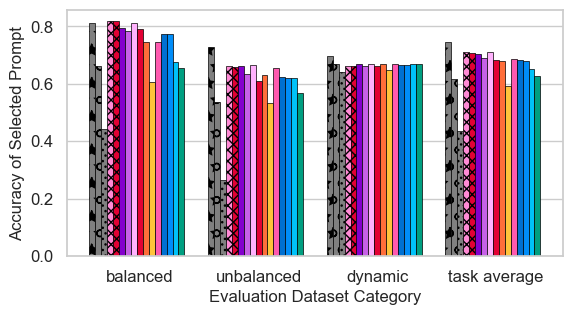

figure_19_legend.pdf


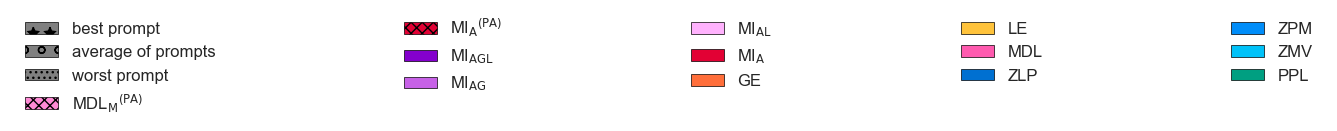

figure_19_f1.pdf


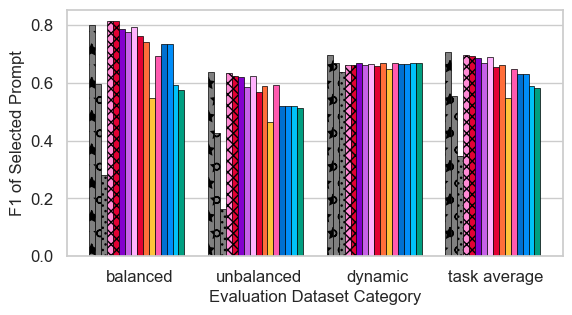

figure_19_legend.pdf


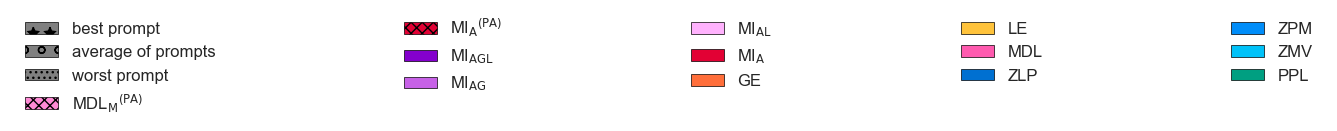

In [20]:
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict({'setup': 'few', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = nomi_main_method_order

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average, only_nn=False)

options = dict(
    df = df,
    bar_width = 0.05,
    legend_width = 17,
    xlabel = 'category',
    index_order = category_order + ['task average'],
    column_order = method_order,
    columns = 'method',
    index = 'category',
    method_axis = 'columns',
    color_fn = lambda idx, col: method_color_map[col],
    hatch_fn = lambda idx, col: method_hatch_map[col],
    title = '',
    add_lines = False,
    ylim = None,
    pnames = ['acc', 'f1'],
    figsize=(6.4, 3.2),
    figname = 'figure_19',
)
draw_bar(**options)

# Figure 20

Accuracy and F1 of the prompts selected by different probability-based prompt selection methods for each category, shown for OPT 2.7B and the average of 10 models. The methods with superscripts and/or subscripts are the methods proposed in this work through unified evaluation and analysis.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'opt2.7b'}
figure_20_a_acc.pdf


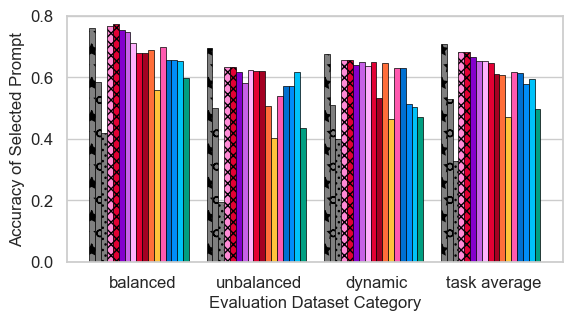

figure_20_a_legend.pdf


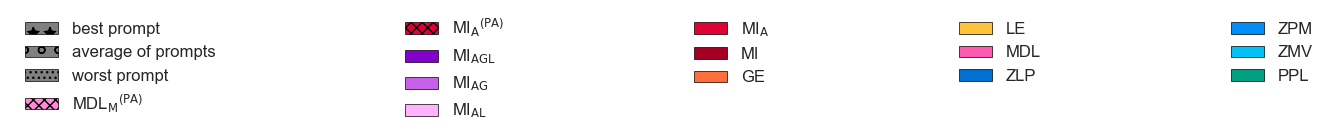

figure_20_a_f1.pdf


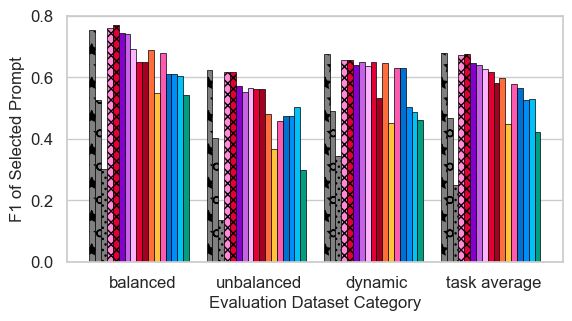

figure_20_a_legend.pdf


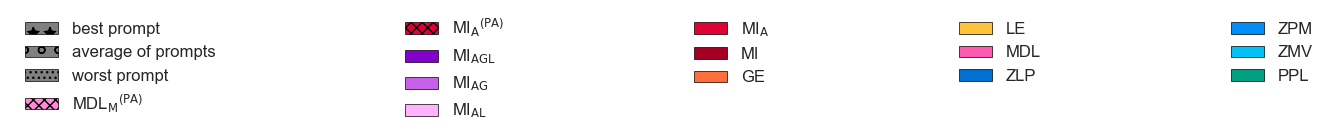

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}
figure_20_b_acc.pdf


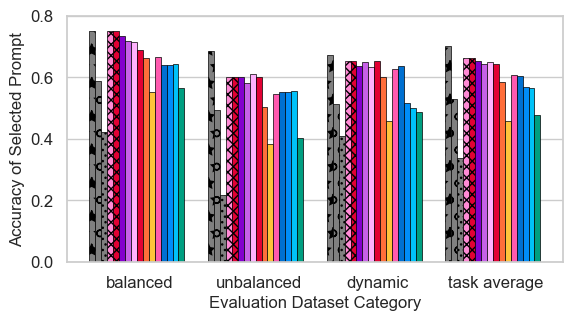

figure_20_b_legend.pdf


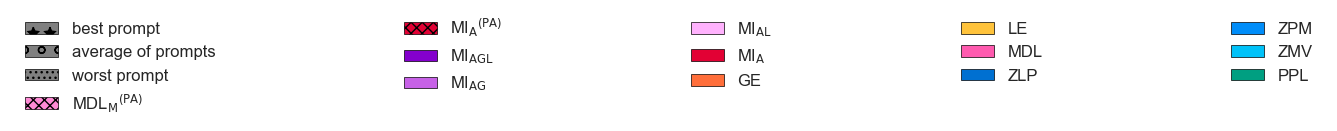

figure_20_b_f1.pdf


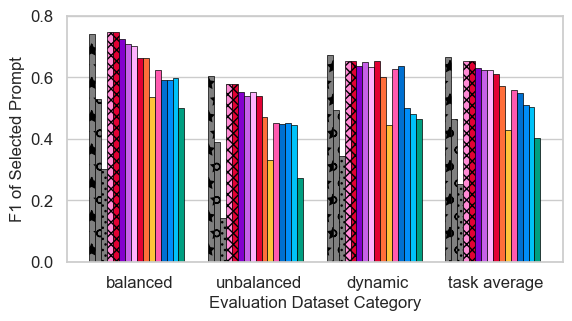

figure_20_b_legend.pdf


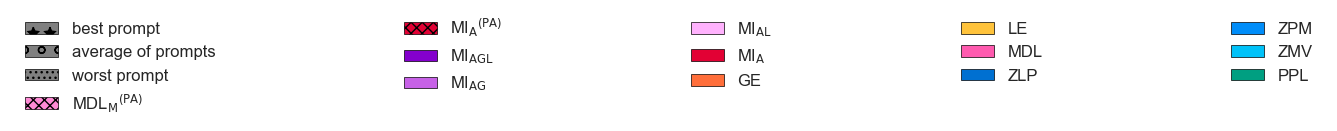

In [21]:
# (a) OPT 2.7B
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = main_method_order

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average, only_nn=False)

options = dict(
    df = df,
    bar_width = 0.05,
    legend_width = 17,
    xlabel = 'category',
    index_order = category_order + ['task average'],
    column_order = method_order,
    columns = 'method',
    index = 'category',
    method_axis = 'columns',
    color_fn = lambda idx, col: method_color_map[col],
    hatch_fn = lambda idx, col: method_hatch_map[col],
    title = '',
    add_lines = False,
    pnames = ['acc', 'f1'],
    figsize=(6.4, 3.2),
    figname = 'figure_20_a',
)
draw_bar(**options)

# (b) Average of All Models
no_udynamic = True
add_task_average = True
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
method_order = nomi_main_method_order

df = get_for_baseline(ps_dict, method_order=method_order, no_udynamic=no_udynamic, add_task_average=add_task_average, only_nn=False)

options = dict(
    df = df,
    bar_width = 0.05,
    legend_width = 17,
    xlabel = 'category',
    index_order = category_order + ['task average'],
    column_order = method_order,
    columns = 'method',
    index = 'category',
    method_axis = 'columns',
    color_fn = lambda idx, col: method_color_map[col],
    hatch_fn = lambda idx, col: method_hatch_map[col],
    title = '',
    add_lines = False,
    pnames = ['acc', 'f1'],
    figsize=(6.4, 3.2),
    figname = 'figure_20_b',
)
draw_bar(**options)

# Figure 21

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_gpt-neo1.3b_acc.pdf


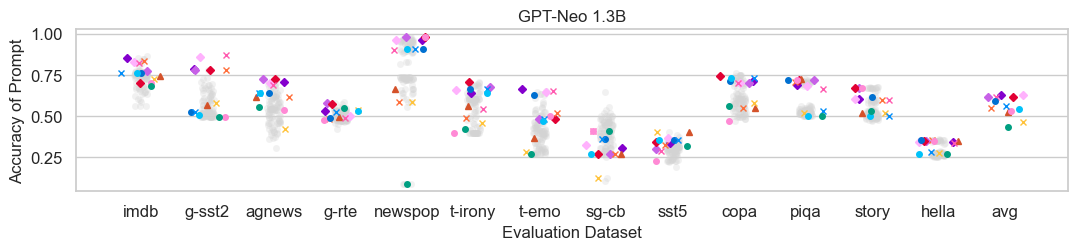

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_gpt-neo1.3b_f1.pdf


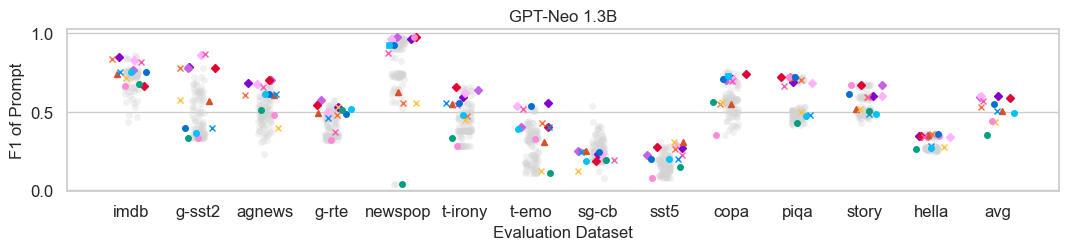

figure_21_gpt-neo1.3b_legend.pdf


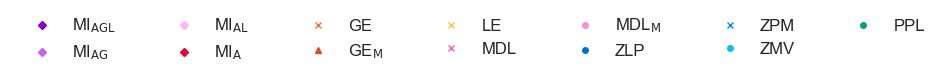

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_opt1.3b_acc.pdf


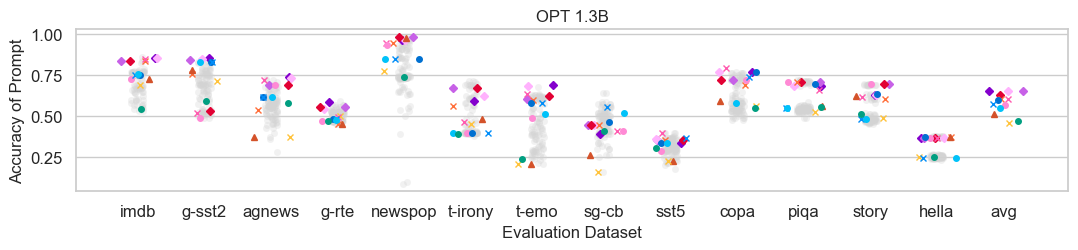

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_opt1.3b_f1.pdf


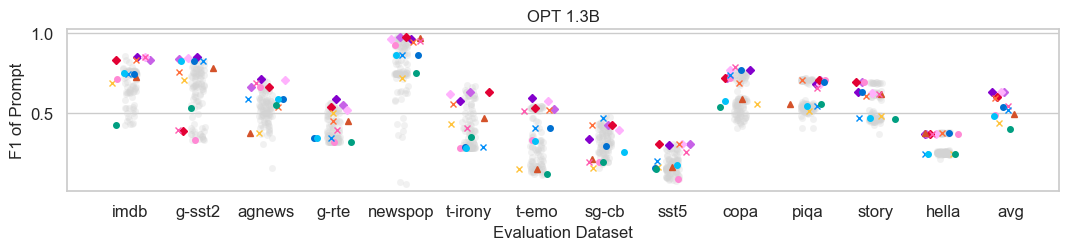

figure_21_opt1.3b_legend.pdf


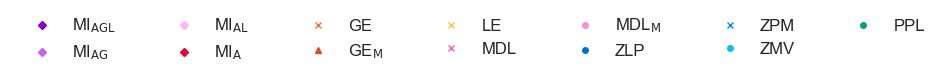

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_gpt1.5b_acc.pdf


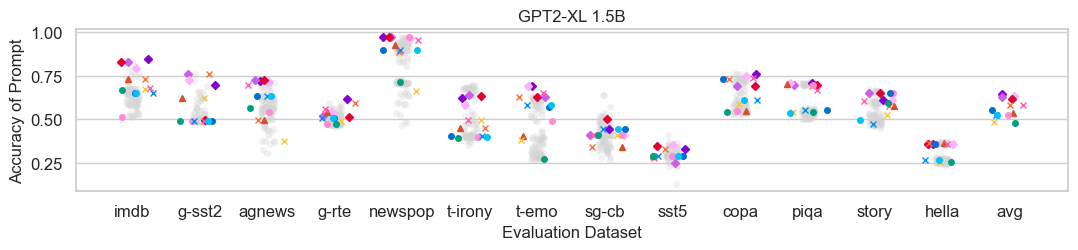

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_gpt1.5b_f1.pdf


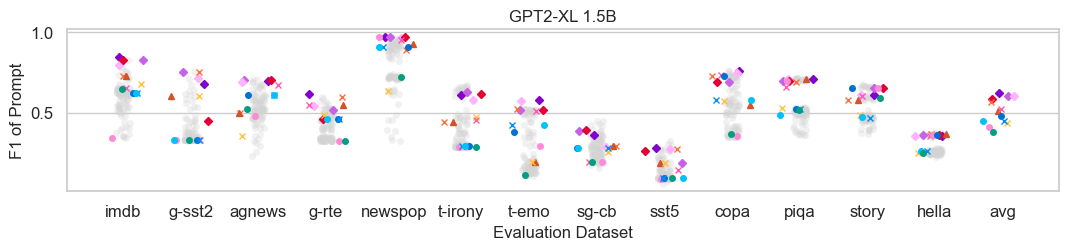

figure_21_gpt1.5b_legend.pdf


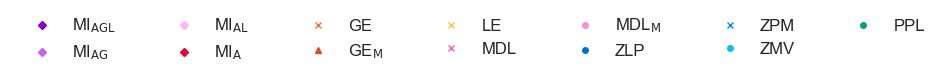

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_gpt-neo2.7b_acc.pdf


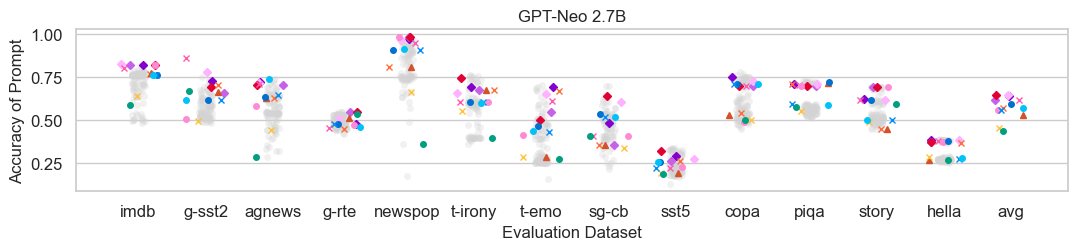

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_gpt-neo2.7b_f1.pdf


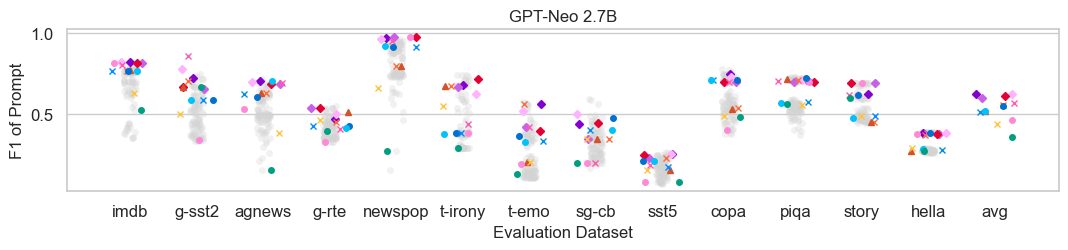

figure_21_gpt-neo2.7b_legend.pdf


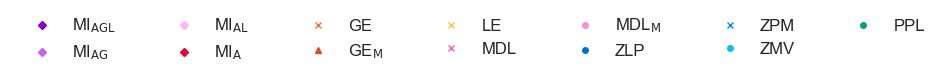

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_opt2.7b_acc.pdf


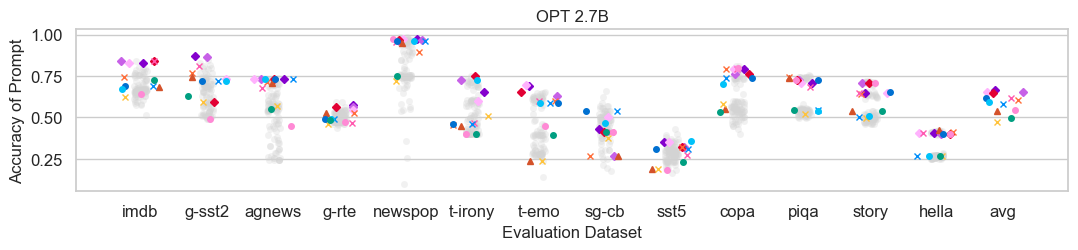

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_opt2.7b_f1.pdf


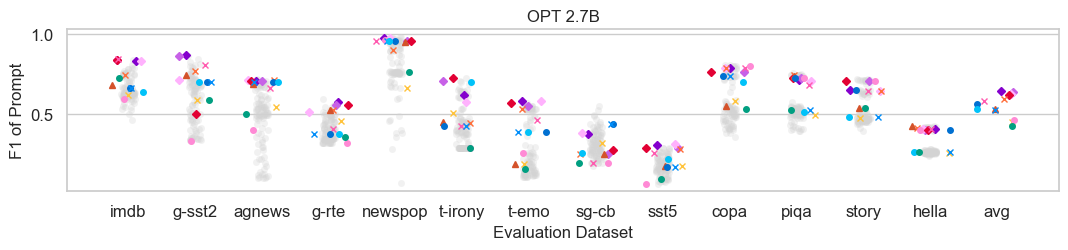

figure_21_opt2.7b_legend.pdf


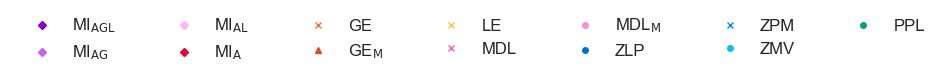

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_bloom3b_acc.pdf


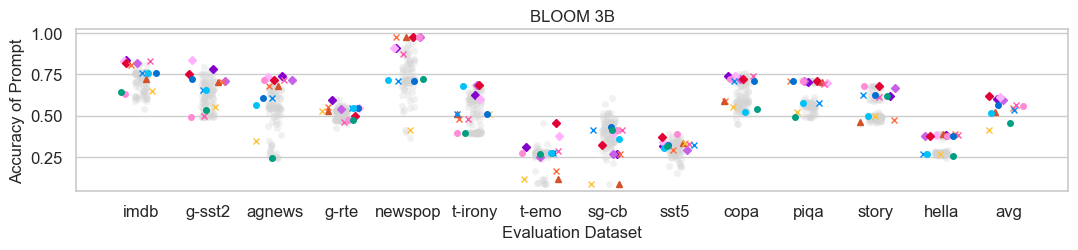

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_bloom3b_f1.pdf


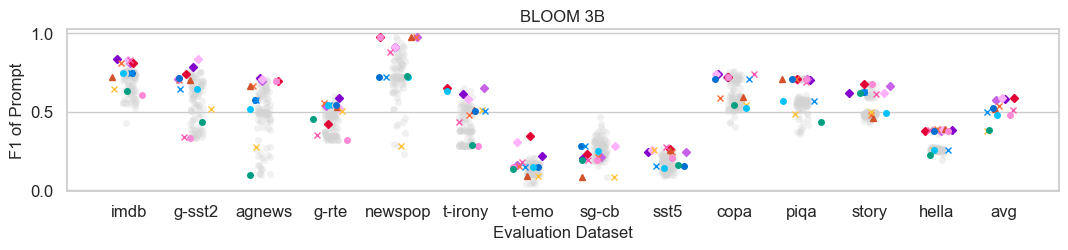

figure_21_bloom3b_legend.pdf


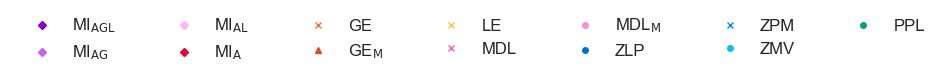

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_gpt-j6b_acc.pdf


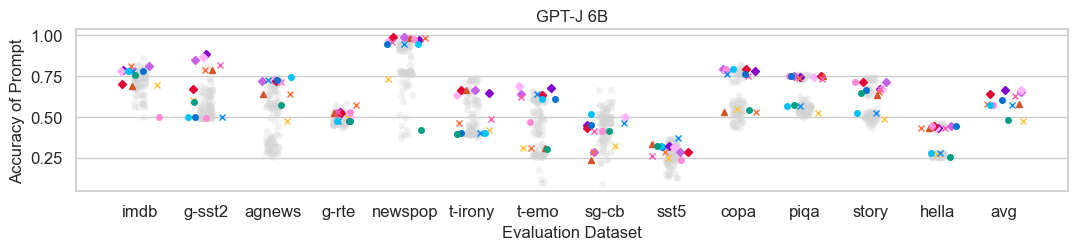

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_gpt-j6b_f1.pdf


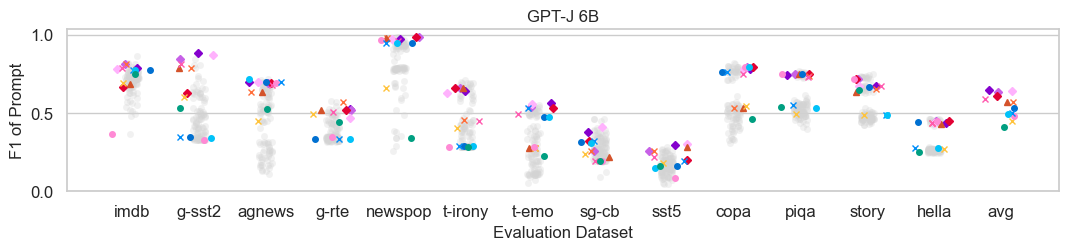

figure_21_gpt-j6b_legend.pdf


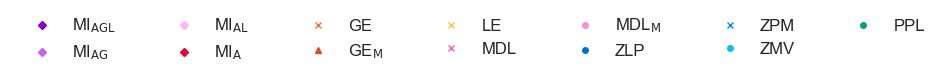

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_opt6.7b_acc.pdf


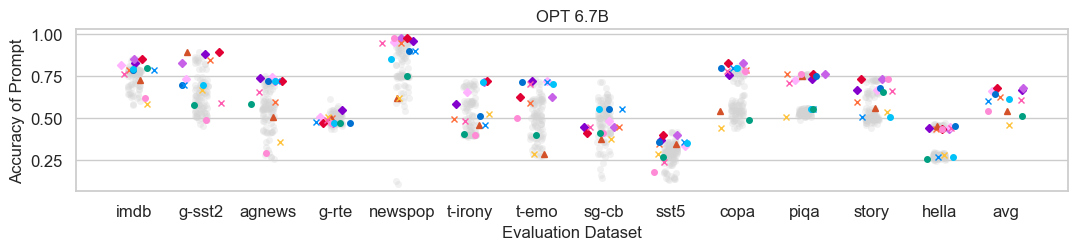

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_opt6.7b_f1.pdf


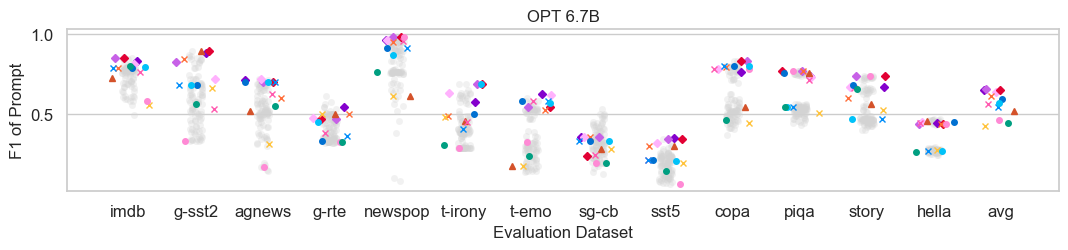

figure_21_opt6.7b_legend.pdf


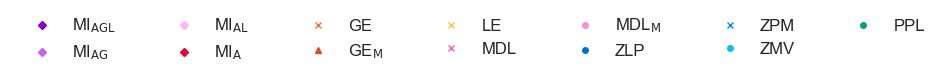

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_opt30b_acc.pdf


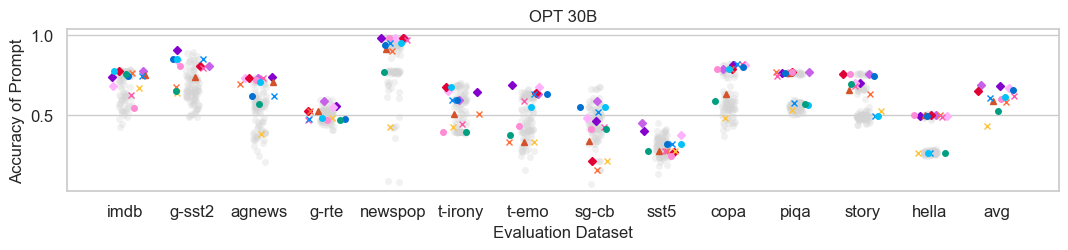

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_opt30b_f1.pdf


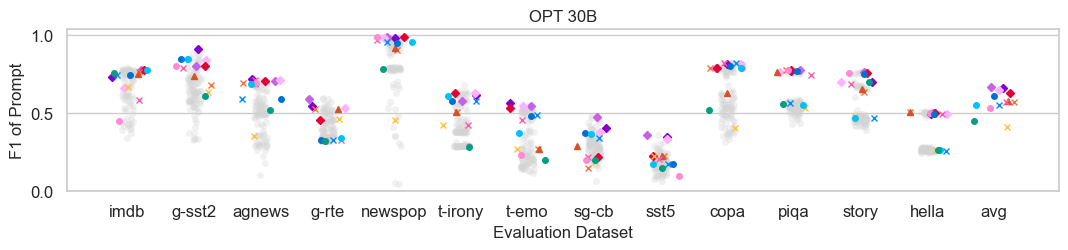

figure_21_opt30b_legend.pdf


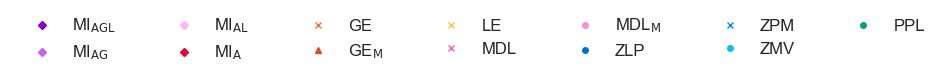

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl
{'gpt-j6b', 'opt66b', 'opt6.7b', 'bloom3b', 'opt1.3b', 'opt2.7b', 'opt30b', 'gpt1.5b', 'gpt-neo1.3b', 'gpt-neo2.7b'}


/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_opt66b_acc.pdf


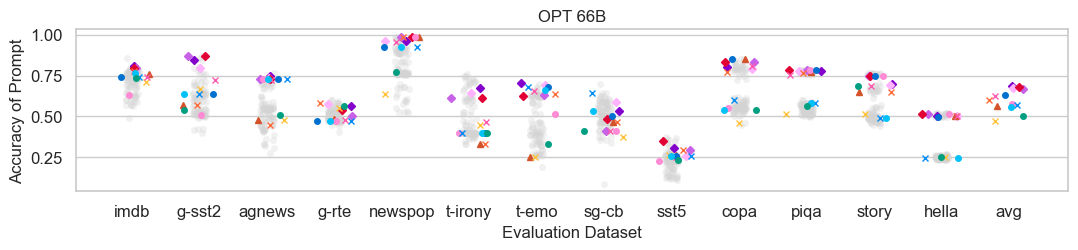

/Users/gimmaru/lk_lab/t-zero/reproduction/figures_utils.py:1234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([rename_map[i] for i in index_order], rotation=0)


figure_21_opt66b_f1.pdf


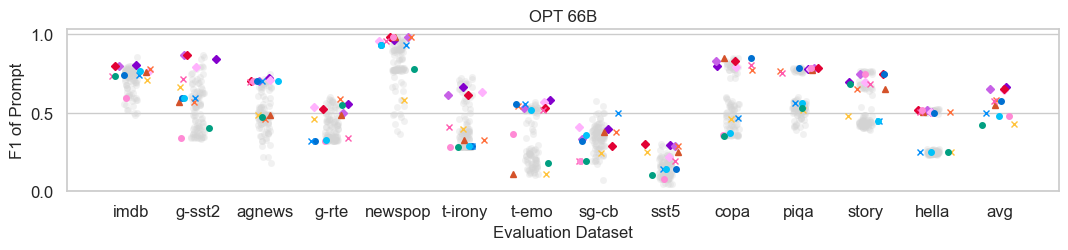

figure_21_opt66b_legend.pdf


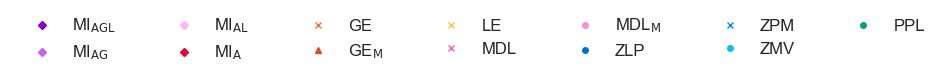

In [22]:
no_udynamic = True
only_nn = True
only_opt = True
add_task_average = True

option = {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False}
metric_dict = get_metric_dict(option)

for model in model_order:
    metric = filter_dataframe(metric_dict['metric'], {'model': model}, no_udynamic=no_udynamic, only_nn=only_nn, only_opt=False)
    option = {'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False}
    ps_dict = read_ps_dict(option)
    method_order = nomi_transfer_method_order
    df = get_for_baseline(
        ps_dict, method_order=method_order,
        no_udynamic=no_udynamic, add_task_average=add_task_average, filter={'model': model}
    )

    options = dict(
        metric = metric,
        df = df,
        method_order = method_order,
        index = 'task',
        index_order = task_order + ['avg'],
        figsize = (12.8, 2.1),
        markersize = 4,
        legend_width = 12,
        marker = 'o',
        jitter = 0.3,
        alpha = 1.0,
        pnames = ['acc', 'f1'],
        xlabel = 'task',
        title = rename_map[model],
        figname = f'figure_21_{model}',
    )
    draw_stripplot(**options)

# Figure 22

Performance of the prompts which show the highest performance for each evaluation dataset and model.

../ps_dicts/setup=v1__cali_type=ours__cali_norm_type=softmax__do_filter=False.pkl


figure_22_acc_BEST.pdf


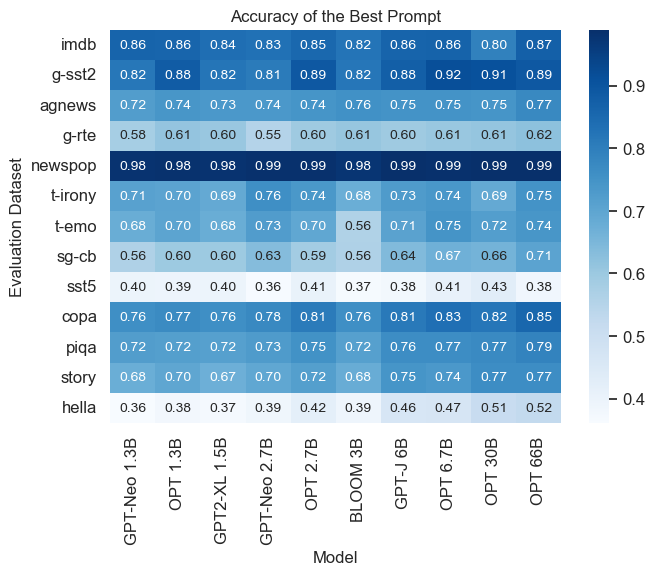

figure_22_f1_BEST.pdf


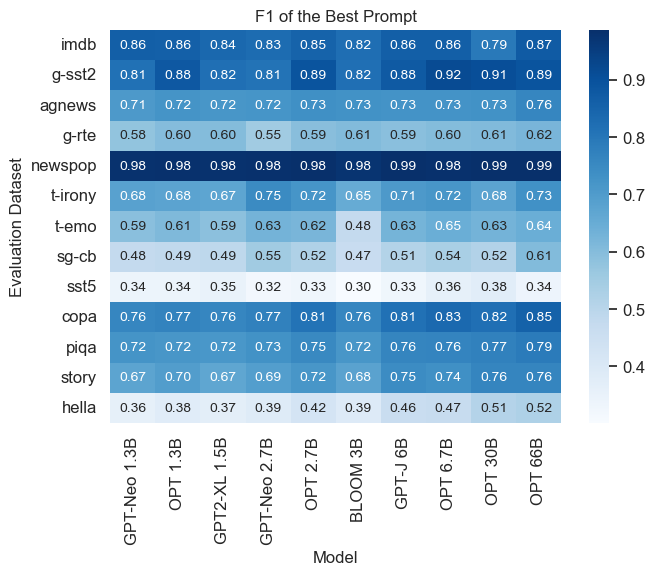

In [23]:
ps_dict = read_ps_dict({'setup': 'v1', 'cali_type': 'ours', 'cali_norm_type': 'softmax', 'do_filter': False})
df = filter_dataframe(ps_dict['ps_df'], {'method': 'MIa'})

draw_heatmap(
    df = df,
    index = 'task',
    columns = 'model',
    index_order = task_order,
    column_order = model_order,
    figsize = None,
    annot_size = 10,
    pnames = ['acc_BEST', 'f1_BEST'],
    xlabel = 'model',
    ylabel = 'task',
    title = True,
    cmap = 'Blues',
    figname = 'figure_22',
)

# Figure 23

Ratio of prompts (out of 100) whose performance improved by applying each calibration method for answer selection, evaluated for each model and task

ours
['opt66b' 'opt2.7b' 'opt30b' 'gpt-neo2.7b' 'bloom3b' 'opt1.3b' 'gpt1.5b'
 'gpt-j6b' 'opt6.7b' 'gpt-neo1.3b']
figure_23_ours_acc_better.pdf


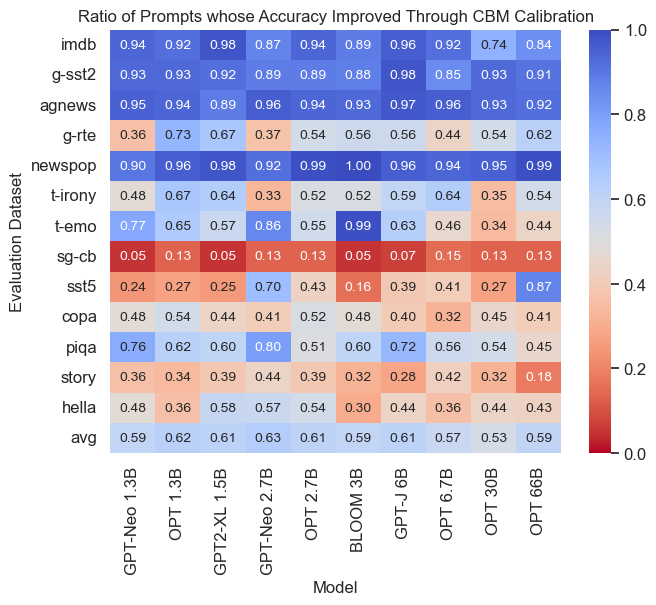

figure_23_ours_f1_better.pdf


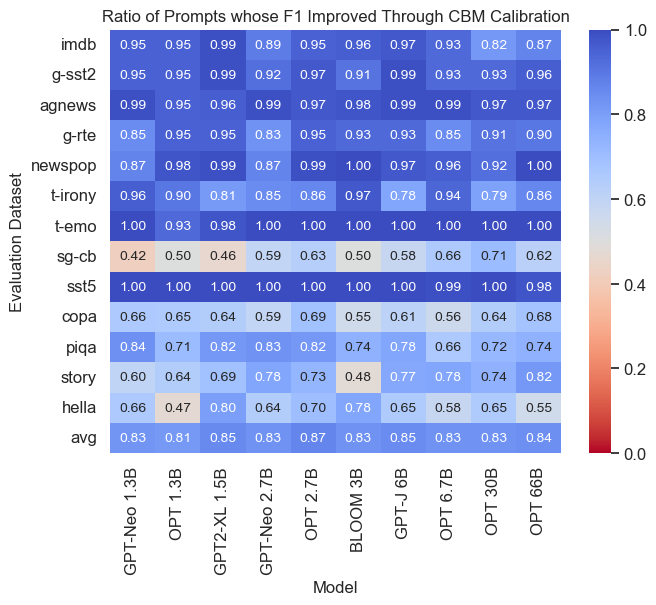

pmi
['opt66b' 'opt30b' 'gpt-neo1.3b' 'bloom3b' 'gpt-neo2.7b' 'gpt-j6b'
 'opt2.7b' 'opt6.7b' 'gpt1.5b' 'opt1.3b']
figure_23_pmi_acc_better.pdf


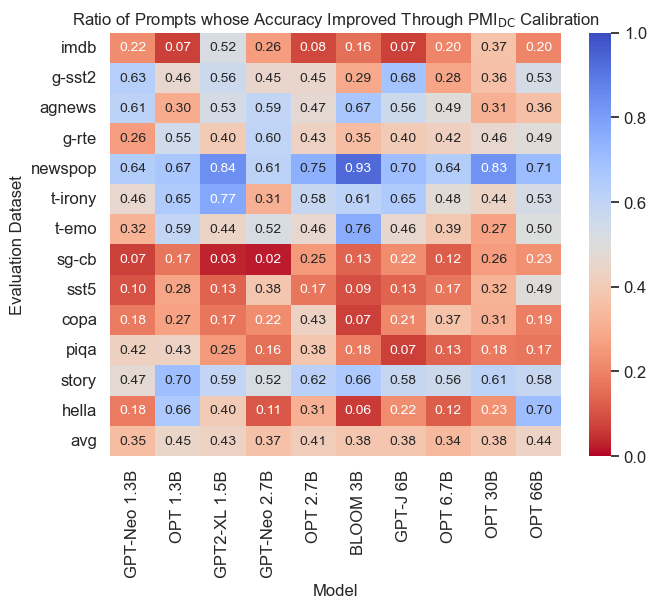

figure_23_pmi_f1_better.pdf


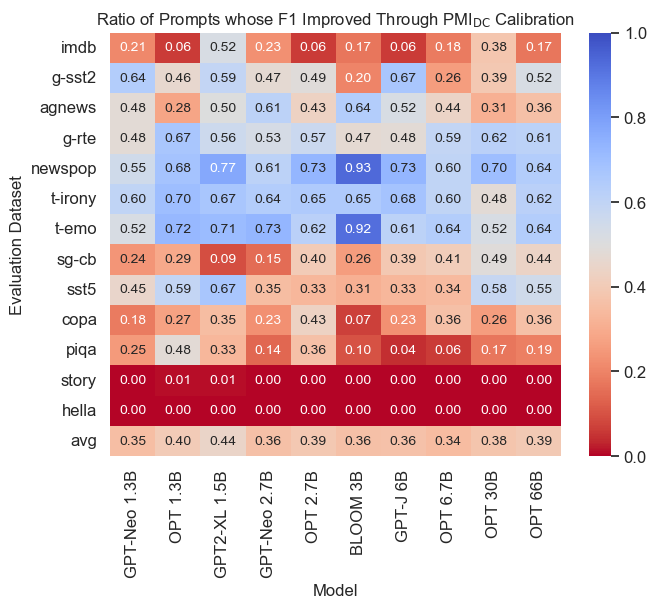

cbu
['gpt-j6b' 'gpt1.5b' 'bloom3b' 'opt6.7b' 'gpt-neo1.3b' 'opt30b'
 'gpt-neo2.7b' 'opt1.3b' 'opt2.7b' 'opt66b']
figure_23_cbu_acc_better.pdf


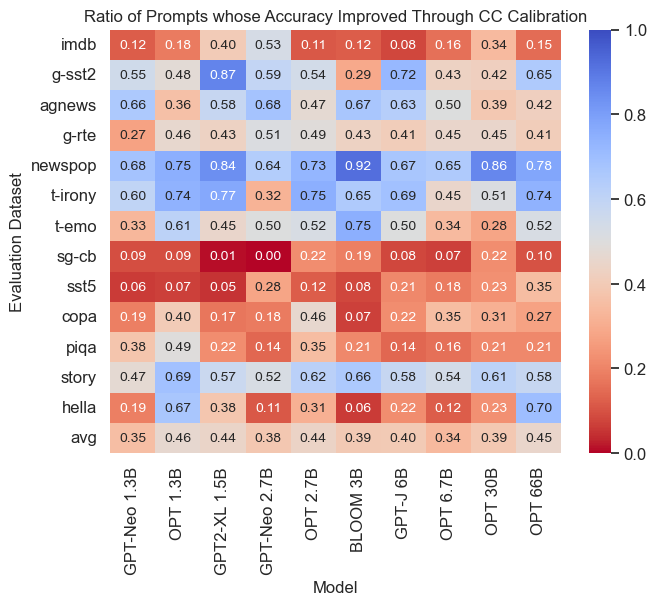

figure_23_cbu_f1_better.pdf


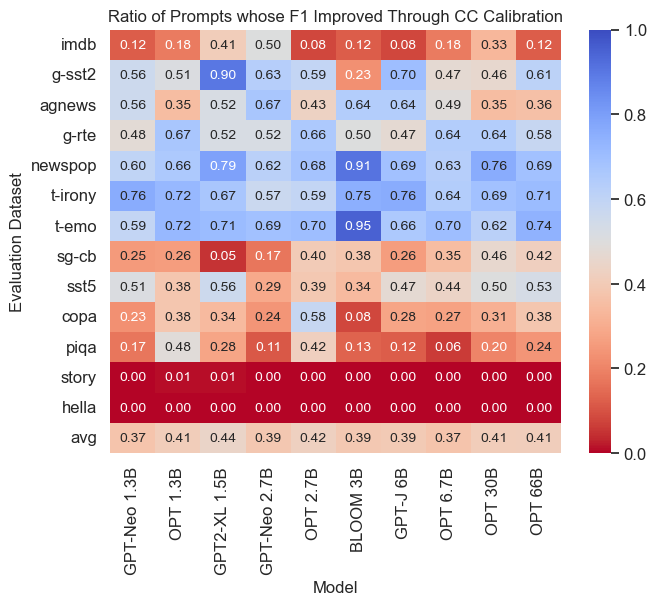

In [24]:
sanities = []
for cali_type in cali_type_order:
    print(cali_type)
    option = {'setup': 'v1', 'cali_type': cali_type, 'cali_norm_type': 'softmax', 'do_filter': False}
    _metric_dict = get_metric_dict(option)
    columns = ['model', 'task', 'prompt', 'category', 'setup', 'cali_type', 'cali_norm_type', 'do_filter']
    nn = filter_dataframe(_metric_dict['metric'], {'combn': 'NN'}).drop('combn', axis=1)[columns + ['acc', 'f1']]
    nc = filter_dataframe(_metric_dict['metric'], {'combn': 'NC'}).drop('combn', axis=1)[columns + ['acc', 'f1']]
    sanity = nn.merge(nc, on=columns)
    sanity['acc_better'] = sanity['acc_x'] < sanity['acc_y']
    sanity['f1_better'] = sanity['f1_x'] < sanity['f1_y']

    sanity = filter_dataframe(sanity, no_udynamic=True)
    sanities.append(sanity)
    print(sanity['model'].unique())

    for pname in ['acc_better', 'f1_better']:
        matrix = sanity.groupby(['task', 'model'])[pname].mean().unstack()
        matrix.loc['avg', :] = matrix.mean(axis=0)
        matrix = matrix[model_order].transpose()[task_order + ['avg']].transpose()
        draw_simple_heatmap(
            matrix,
            pname,
            index = 'task',
            columns = 'model',
            higher_better = True,
            figsize = None,
            annot_size = 10,
            cmap = 'coolwarm_r',
            xlabel = 'model',
            ylabel = 'task',
            title = f"Ratio of Prompts whose {'Accuracy' if 'acc' in pname else 'F1'} Improved Through {rename_map[cali_type]} Calibration",
            figname = f'figure_23_{cali_type}',
            vmin_vmax = (0, 1),
        )